# **Satisfacción de los clientes en la aerolínea**
---
Trabajo realizado por:  Abdelaziz El Kadi Lachehab, Matías Sebastián Flores, Héctor Daniel González Vargas,  Yassmin Lakhal Lachhab, Javier Linares Castrillón y Álvaro carracedo Ortiz para la asignatura Gestión de Proyectos del Máster en Big Data Science de la Universidad de Navarra.

## Planteamiento del problema

La baja tasa de respuesta a las encuestas, situada por debajo del 20%, constituye un desafío significativo para nuestra aerolínea en la evaluación de la satisfacción del cliente. Por lo tanto, nos hemos propuesto <ins>**desarrollar un modelo de clasificación**</ins> que nos permita estimar la probabilidad de satisfacción de un pasajero durante su viaje, sin depender de encuestas. Esta iniciativa nos brindará la capacidad de tomar decisiones proactivas, como la formulación de ofertas personalizadas en futuros viajes o la implementación de compensaciones adicionales en casos de demoras.

Además, como parte integral de nuestro proyecto, buscaremos identificar áreas de mejora dentro de la experiencia del cliente. A través del análisis de la importancia de las variables en nuestro modelo de clasificación, podremos determinar la viabilidad de añadir o eliminar servicios para optimizar su satisfacción. La interpretación de estas variables críticas nos permitirá tomar decisiones fundamentadas sobre la optimización de nuestra oferta de servicios, asegurando que cada modificación esté respaldada por su impacto real en la satisfacción general del cliente.


# Carga de datos e imports

In [ ]:
# Pip intalls necesarios
#!pip install ydata-profiling
#!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


sns.set() #restablece la configuración de valores predeterminados de Seaborn

In [ ]:
# ID del archivo de Google Drive
file_id = '1BOP-L8GDH0YMinEvF_ZWH5_Muosmib8X'

# Crea el enlace directo
direct_link = f'https://drive.google.com/uc?id={file_id}'



In [ ]:
# Usa pandas para leer el CSV desde el enlace directo
data = pd.read_csv(direct_link,index_col=[0], sep=';')

# Dimensiones de los datos
print(data.shape)

# Muestra todas las columnas para ver el tipo de datos que tenemos en el df
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)  # Muestra el contenido completo de las columnas

data.head()

(129880, 25)


id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flights per year  Flight Distance  Inflight wifi service  \
0               2.0              460                    3.0   
1               3.0              235                    3.0   
2               3.0             1142                    2.0   
3               3.0              562                    2.0   
4               7.0              214                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [ ]:
# Eliminamos del análisis la columna id
data = data.drop(['id'], axis=1)

# Dimensiones de los datos
print(data.shape)

data.head()

(129880, 24)


Gender      Customer Type  Age   Type of Travel     Class  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    Male  disloyal Customer   25  Business travel  Business   
2  Female     Loyal Customer   26  Business travel  Business   
3  Female     Loyal Customer   25  Business travel  Business   
4    Male     Loyal Customer   61  Business travel  Business   

   Flights per year  Flight Distance  Inflight wifi service  \
0               2.0              460                    3.0   
1               3.0              235                    3.0   
2               3.0             1142                    2.0   
3               3.0              562                    2.0   
4               7.0              214                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

# Análisis de datos

Tras la carga de los datos, procedemos a realizar un resumen descriptivo y estadístico de las variables presentes en la base de datos.

## Análisis Preliminar

In [ ]:
#Datos estadísticos de las variables numéricas
data.describe()

Age  Flights per year  Flight Distance  \
count  129880.000000     129840.000000    129880.000000   
mean       39.427957          4.378327      1190.316392   
std        15.119360          1.522318       997.452477   
min         7.000000          1.000000        31.000000   
25%        27.000000          3.000000       414.000000   
50%        40.000000          4.000000       844.000000   
75%        51.000000          6.000000      1744.000000   
max        85.000000          9.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129845.000000                      129880.000000   
mean                2.728376                           3.057599   
std                 1.329276                           1.526741   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           129880.000000  129880.000000   129880.000000    129880.000000   
mean                 2.756876       2.976925        3.204774         3.252633   
std                  1.401740       1.278520        1.329933         1.350719   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  129880.000000           129880.000000     129880.000000   
mean        3.441361                3.358077          3.383023   
std         1.319289                1.334049          1.287099   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     129880.000000     129880.000000    129880.000000     129880.000000   
mean           3.350878          3.632114         3.306267          3.642193   
std            1.316252          1.180025         1.266185          1.176669   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  129880.000000               129880.000000             129487.000000  
mean        3.286326                   14.713713                 15.091129  
std         1.313682                   38.071126                 38.465650  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

Con relación a la satisfacción de los servicios, estos presentan una media general cercana a 3, por lo que apunta a una tendencia hacia una satisfacción neutral o ligeramente positiva de los servicios. Esto refleja una oportunidad para la aerolínea de mejorar ciertos aspectos y así incrementar la satisfacción del cliente.

En cuanto a los tiempos de retraso tanto en las salidas como en las llegadas de los vuelos, en general, la aerolínea mantiene bastante buena puntualidad, con la mediana de retrasos siendo 0 minutos y el tercer cuartil (75%) se encuentra en 12 minutos. Sin embargo, también se presentan variaciones extremas en los retrasos, alcanzando hasta 1,592 minutos para la salida y 1,584 minutos para la llegada.


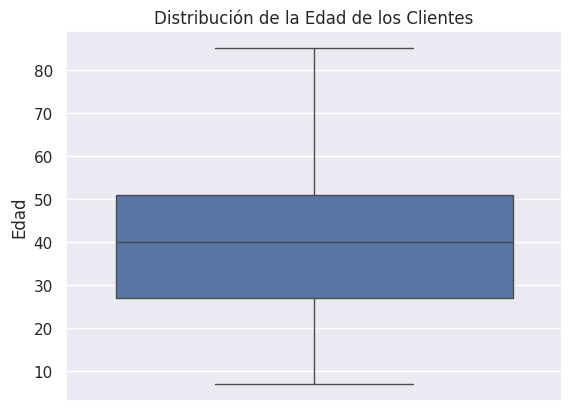

In [ ]:
# Boxplot de la variable edad
sns.boxplot(y=data['Age'])
plt.title('Distribución de la Edad de los Clientes')
plt.ylabel('Edad')
plt.show()

El boxplot de la variable "Age" confirma un amplio rango de edades entre los pasajeros, variando desde los 7 hasta los 85 años y con una edad media de 39 años. Este dato destaca la diversidad demográfica de los pasajeros de la aerolínea. Dado que el objetivo es predecir la satisfacción del cliente, el amplio rango de edades subraya la importancia de adaptar los servicios de vuelo a las necesidades y expectativas específicas de los distintos grupos.

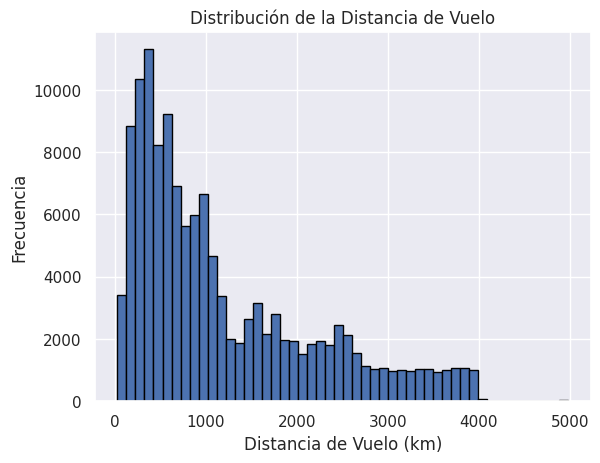

In [ ]:
# Histograma variable distancia de vuelo
data['Flight Distance'].hist(bins=50, edgecolor='black')
plt.title('Distribución de la Distancia de Vuelo')
plt.xlabel('Distancia de Vuelo (km)')
plt.ylabel('Frecuencia')
plt.show()

El anterior histograma refleja una gran variabilidad en la " Flight distance ", con distancias que van desde los 31 km hasta los 4,983 km y una distancia media de 1,190 km. Por tanto, la base de datos abarca tanto vuelos cortos como largos. Sin embargo, se observa una mayor frecuencia de vuelos que no superan los 1,000 km, lo que indica que la mayoría de los vuelos que opera la aerolínea son de corta distancia.

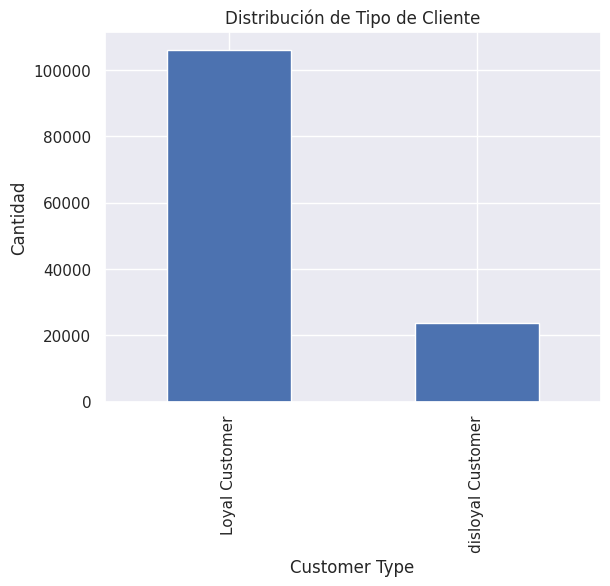

In [ ]:
# Gráfico barras variablE 'Customer Type'
data['Customer Type'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipo de Cliente')
plt.ylabel('Cantidad')
plt.show()

Como se muestra en el anterior gráfico, hay una predominancia de pasajeros clasificados como 'Loyal Customer' sobre los 'disloyal Customer'. Esto muestra que la aerolínea ha logrado mantener una base de pasajeros leales significativa, lo que es un indicador positivo de la satisfacción del cliente a largo plazo y la retención de clientes.

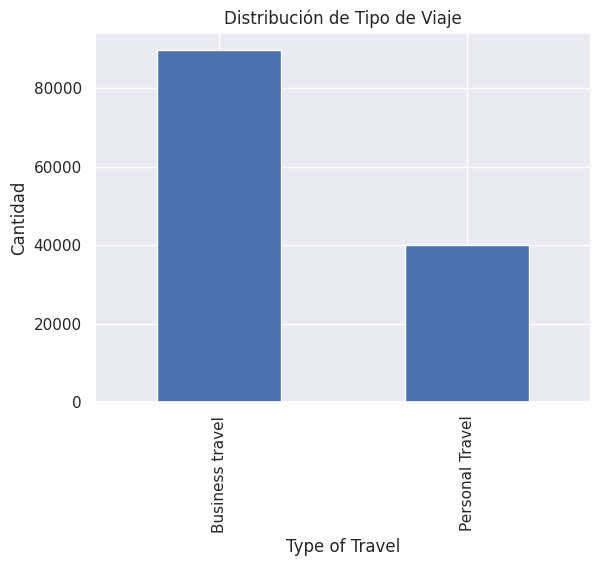

In [ ]:
# Gráfico barras variable 'Type of Travel'
data['Type of Travel'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipo de Viaje')
plt.ylabel('Cantidad')
plt.show()

La distribución del tipo de viaje muestra que hay más pasajeros que viajan por negocios que por motivos personales. Esto indicaría que la aerolínea es preferida por los viajeros de negocios. Por tanto, tal tendencia podría influir en las decisiones sobre qué servicios a bordo se deben tener en cuenta para mejorar.

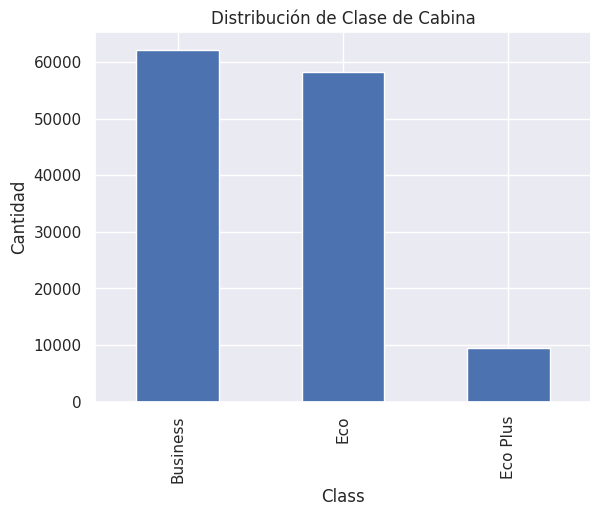

In [ ]:
# Gráfico barras variable 'Class'
data['Class'].value_counts().plot(kind='bar')
plt.title('Distribución de Clase de Cabina')
plt.ylabel('Cantidad')
plt.show()

La distribución por clases de cabina muestra que las opciones 'Business' y 'Eco' son similares en términos de pasajeros, mientras que 'Eco Plus' es menos elegida. Este resultado apunta a la necesidad de revaluar la oferta de 'Eco Plus' para aumentar su competitividad. Además, la preferencia por la clase Business se alinea con el supuesto anterior de que una parte notable de los pasajeros viaja por motivos de negocios. Por ello, se puede considerar que hay una demanda significativa de los servicios valorados por este segmento. Con esta información, se podría optar por mejorar los servicios que son valiosos para los viajeros de negocios, lo que podría aumentar la satisfacción del cliente y posiblemente atraer a más clientes.

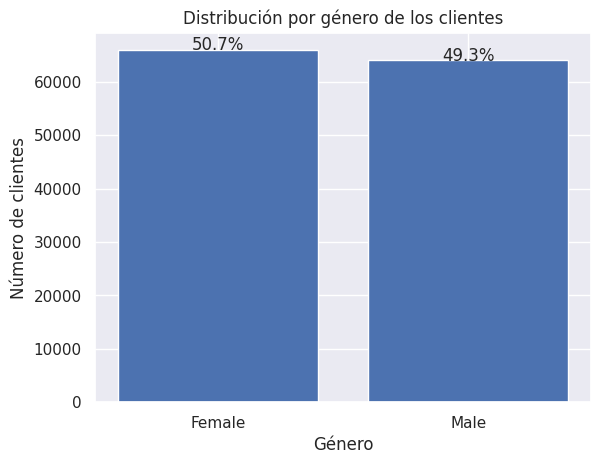

In [ ]:
# Gráfico de barras variable Género
contar_genero = data['Gender'].value_counts()

total = contar_genero.sum()
porcentajes = (contar_genero / total) * 100

plt.bar(contar_genero.index, contar_genero.values)

for i, porcentaje in enumerate(porcentajes):
    plt.text(i, contar_genero.values[i] + 0.5, f'{porcentaje:.1f}%', ha='center')

plt.title('Distribución por género de los clientes')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.show()


Se observa en el gráfico de la distribución por género de los pasajeros una distribución bastante equilibrada entre géneros. Concretamente, el 50.7% de los clientes se identifican como femenino, mientras que el 49.3% se identifican como masculino. Por tanto, los registros de pasajeros que se van a utilizar para predecir la satisfacción abarcan de manera representativa a ambos géneros, permitiendo que las conclusiones que se obtengan en el proyecto no estén sesgadas hacia un solo género.

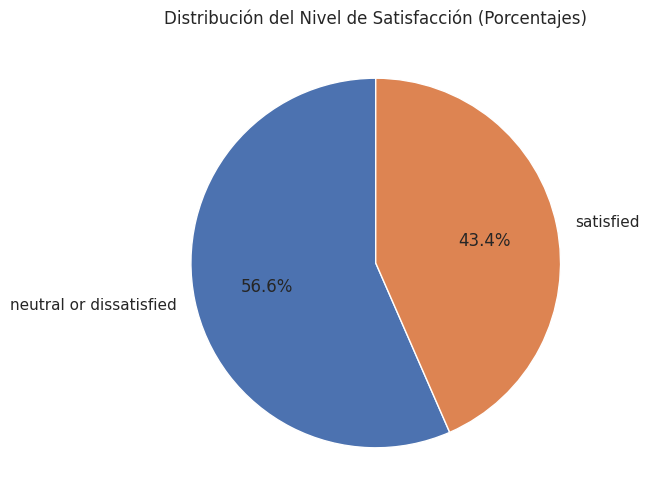

In [ ]:
# Gráfico de pastel variable objetivo
satisfaction_counts = data['satisfaction'].value_counts()
satisfaction_percentages = (satisfaction_counts / satisfaction_counts.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Nivel de Satisfacción (Porcentajes)')
plt.show()

Observando el gráfico de la variable objetivo no parece estar perfectamente balanceada, ya que el 56.6% de las respuestas se inclinan hacia 'neutral or dissatisfied', mientras que el 43.4% están 'satisfied'. Aunque este balance indica que la experiencia del cliente tiene un margen significativo para la mejora.

## Análisis de Uniques

En primer lugar verificaremos la existencia de valores constantes dentro del dataset

In [ ]:
# Encuentra los valores únicos de cada columna
unique_values = data.nunique()

# Muestra los valores únicos de cada columna
print("\nValores únicos de cada columna:")
print(unique_values)


Valores únicos de cada columna:
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flights per year                        9
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
s

No existen variables de valor único. Además las variables categóricas coinciden con los valores posibles.

## Análisis de Varianzas

Adicionalmente a la verificación de valores constantes, identificaremos variables que tengan mínima variación.

In [ ]:
# Calcula la varianza de las columnas numéricas
variance = data.var(numeric_only=True)

# Muestra la varianza de cada columna numérica
print("\nVarianza de las columnas numéricas:")
print(variance)


Varianza de las columnas numéricas:
Age                                     228.595045
Flights per year                          2.317453
Flight Distance                      994911.444525
Inflight wifi service                     1.766975
Departure/Arrival time convenient         2.330940
Ease of Online booking                    1.964874
Gate location                             1.634613
Food and drink                            1.768722
Online boarding                           1.824441
Seat comfort                              1.740523
Inflight entertainment                    1.779687
On-board service                          1.656625
Leg room service                          1.732519
Baggage handling                          1.392458
Checkin service                           1.603225
Inflight service                          1.384550
Cleanliness                               1.725761
Departure Delay in Minutes             1449.410651
Arrival Delay in Minutes               1479.6

Analizando varianza de las variables numéricas Age, Flights per year, Flight distance, Departure Delay in Minutes y Arrival Delay in Minutes no encontramos evidencia suficiente para asumir que no son datos representativos.

## Análisis de Duplicados

Se procede a comprobar que no hay registros duplicados, lo cual teóricamente no debería suceder, sin embargo, se realiza una verificación.

In [ ]:
# Comprobar filas duplicadas
duplicados=data.duplicated().sum()
print(duplicados)

0


## Análisis de Valores Nulos

Una vez analizado que no tenemos datos duplicados, es clave en el proceso de análisis se estudien los valores nulos y más adelante se decidirá si los podemos eliminar o sustituir por otros valores.


In [ ]:
# Verificar los valores nulos en el DataFrame final
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum() / len(data)) * 100).round(2).sort_values(ascending=False)
valores_nulos = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje %'])


# Mostrar la cantidad de valores nulos por columna
print("Valores nulos por columna :")
print(valores_nulos)

Valores nulos por columna :
                                   Total  Porcentaje %
Arrival Delay in Minutes             393          0.30
Flights per year                      40          0.03
Inflight wifi service                 35          0.03
Gender                                 0          0.00
Seat comfort                           0          0.00
Departure Delay in Minutes             0          0.00
Cleanliness                            0          0.00
Inflight service                       0          0.00
Checkin service                        0          0.00
Baggage handling                       0          0.00
Leg room service                       0          0.00
On-board service                       0          0.00
Inflight entertainment                 0          0.00
Online boarding                        0          0.00
Customer Type                          0          0.00
Food and drink                         0          0.00
Gate location                        

Se ha identificado la presencia de valores nulos en las siguientes variables: 'Arrival Delay in Minutes', 'Flights per year' y 'Inflight wifi service'. Estos valores nulos representan un porcentaje pequeño en comparación con el tamaño total del DataFrame (0.30%, 0.03%, y 0.03% respectivamente).

## Identificación de variables numéricas

In [ ]:
# Se obtienen separan las variables categóricas y numéricas
tipos = data.dtypes
print(tipos)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flights per year                     float64
Flight Distance                        int64
Inflight wifi service                float64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
# Se crea una lista para cada tipo de dato
var_num = ['Age', 'Flights per year', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

var_cat = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [ ]:
#Se crea un dataframe que contiene sólo las variables numéricas

data_num = data[var_num]

In [ ]:
#Compruebo que el df con las variables numéricas esté correcto

data_num.head()

Age  Flights per year  Flight Distance  Inflight wifi service  \
0   13               2.0              460                    3.0   
1   25               3.0              235                    3.0   
2   26               3.0             1142                    2.0   
3   25               3.0              562                    2.0   
4   61               7.0              214                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0

## Análisis de valores atípicos



Analizaremos el dataset en busca de valores que puedan afectar la naturalidad de una variable.

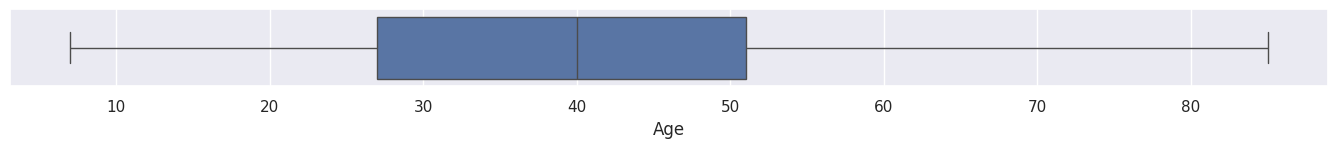

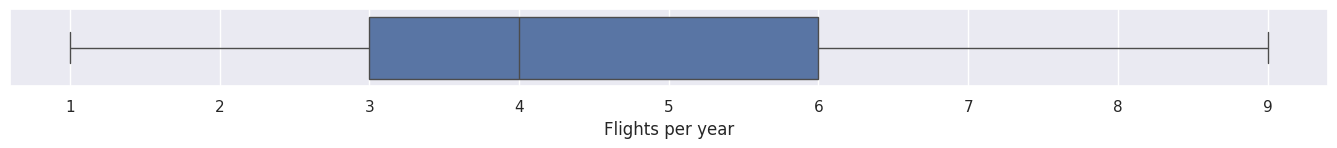

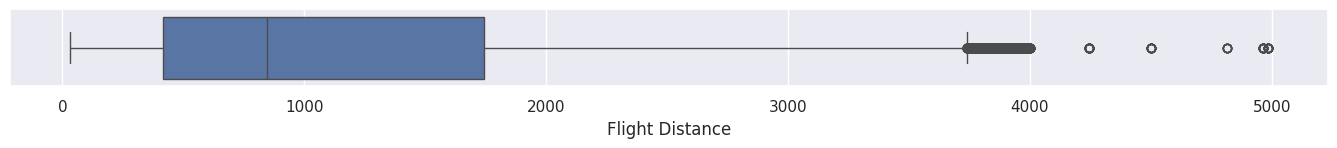

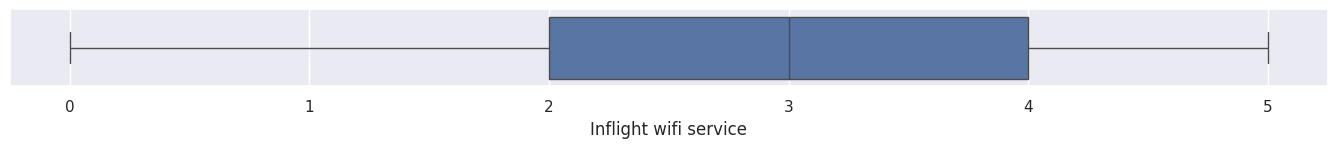

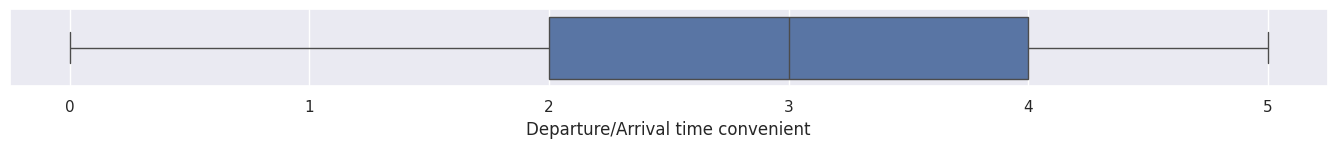

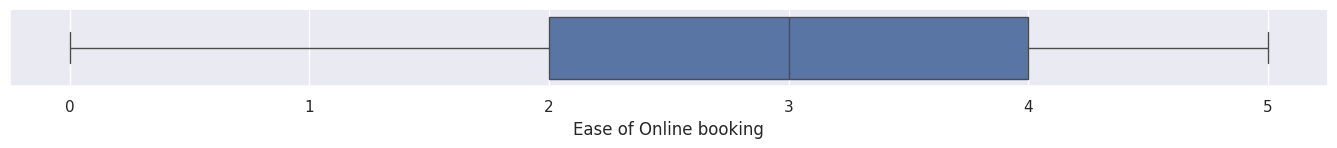

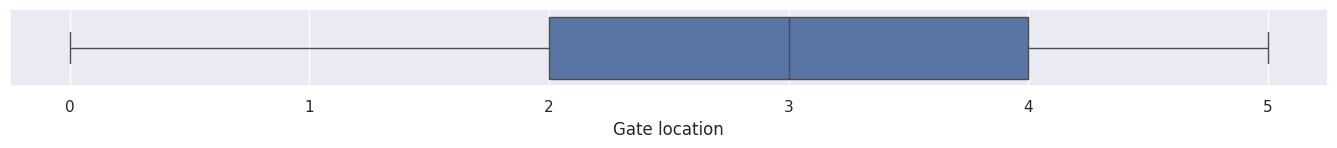

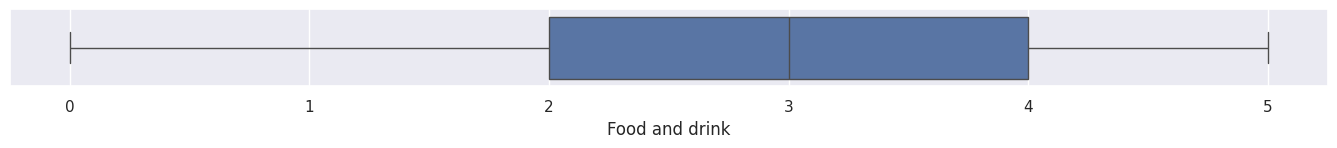

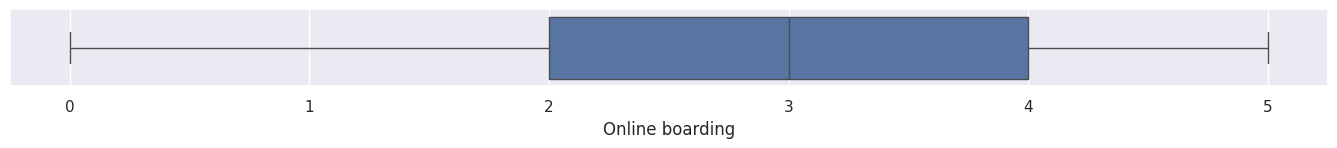

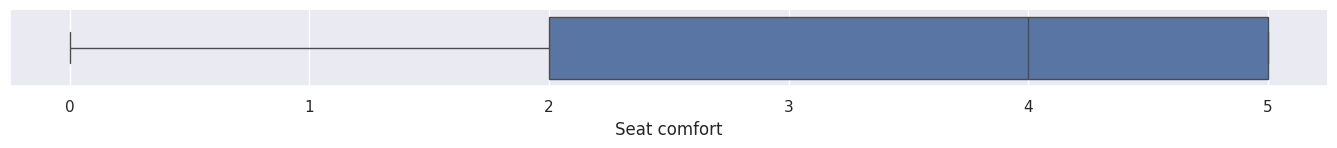

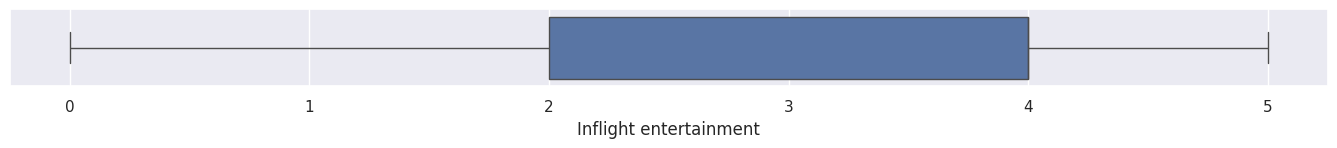

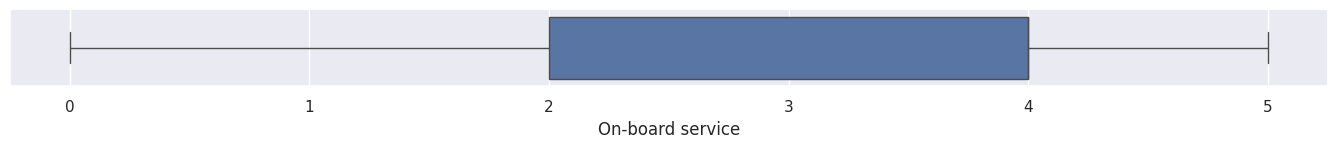

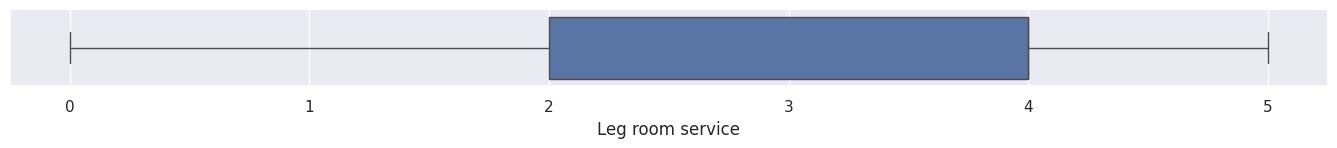

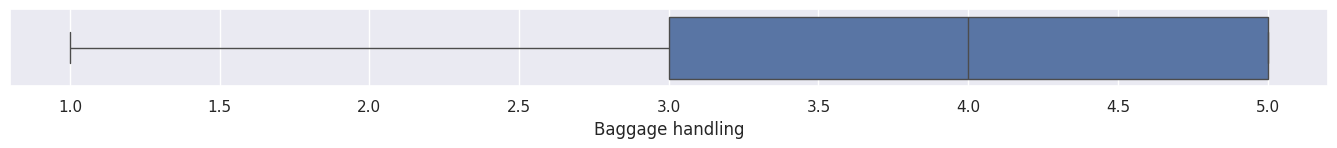

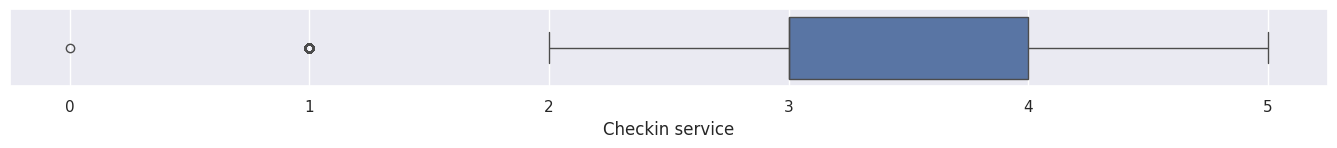

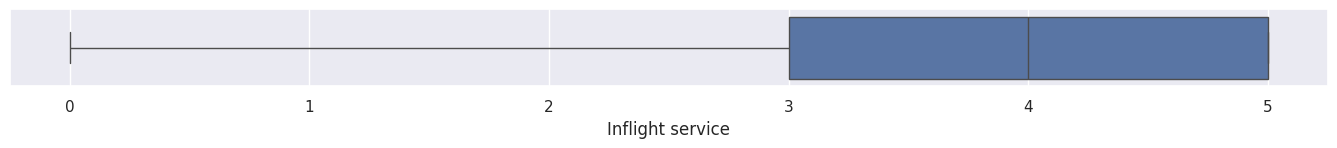

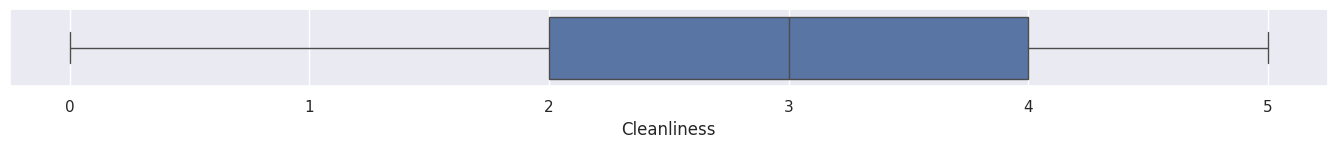

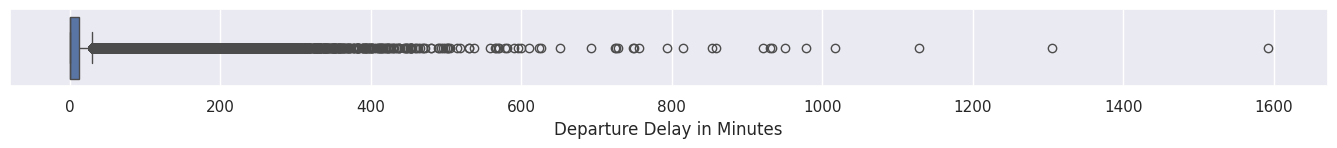

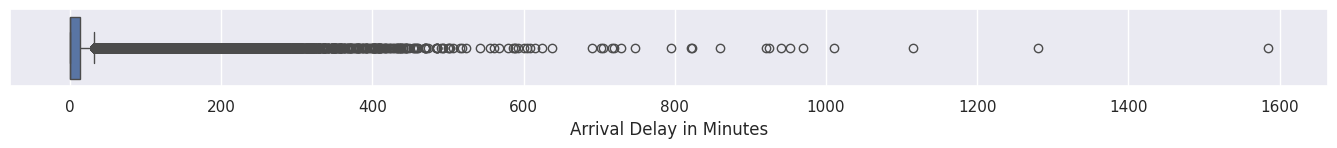

In [ ]:
#Boxplot de todas las variables numéricas
for column in data_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data_num, x=column)

In [ ]:
data_num.describe()

Age  Flights per year  Flight Distance  \
count  129880.000000     129840.000000    129880.000000   
mean       39.427957          4.378327      1190.316392   
std        15.119360          1.522318       997.452477   
min         7.000000          1.000000        31.000000   
25%        27.000000          3.000000       414.000000   
50%        40.000000          4.000000       844.000000   
75%        51.000000          6.000000      1744.000000   
max        85.000000          9.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129845.000000                      129880.000000   
mean                2.728376                           3.057599   
std                 1.329276                           1.526741   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           129880.000000  129880.000000   129880.000000    129880.000000   
mean                 2.756876       2.976925        3.204774         3.252633   
std                  1.401740       1.278520        1.329933         1.350719   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  129880.000000           129880.000000     129880.000000   
mean        3.441361                3.358077          3.383023   
std         1.319289                1.334049          1.287099   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     129880.000000     129880.000000    129880.000000     129880.000000   
mean           3.350878          3.632114         3.306267          3.642193   
std            1.316252          1.180025         1.266185          1.176669   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  129880.000000               129880.000000             129487.000000  
mean        3.286326                   14.713713                 15.091129  
std         1.313682                   38.071126                 38.465650  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

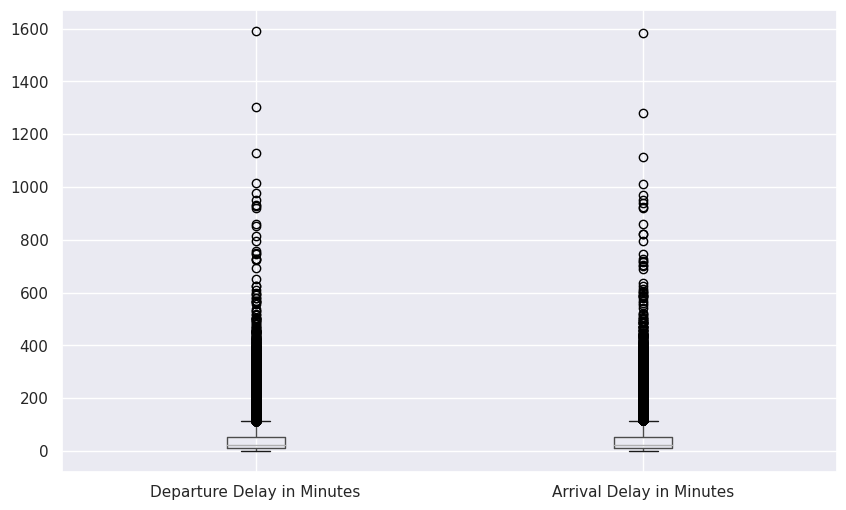

In [ ]:
#Se crea un dataframe sólo con los vuelos retrasados en la salida o llegada
df_cleaned = data_num[(data_num['Departure Delay in Minutes'] != 0) & (data_num['Arrival Delay in Minutes'] != 0)]

plt.figure(figsize=(10, 6))
df_cleaned[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].boxplot()
plt.show()

In [ ]:
df_cleaned.describe()

Age  Flights per year  Flight Distance  Inflight wifi service  \
count  43122.000000      43105.000000     43122.000000           43109.000000   
mean      39.257340          4.363345      1178.022355               2.671438   
std       15.161508          1.525149       991.835030               1.283656   
min        7.000000          1.000000        31.000000               0.000000   
25%       27.000000          3.000000       419.000000               2.000000   
50%       40.000000          4.000000       825.500000               3.000000   
75%       51.000000          6.000000      1707.000000               4.000000   
max       85.000000          9.000000      4963.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       43122.000000            43122.000000   
mean                            3.053221                2.739135   
std                             1.511018                1.378377   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   43122.000000    43122.000000     43122.000000  43122.000000   
mean        2.988776        3.158805         3.184801      3.391842   
std         1.271266        1.333707         1.338859      1.325435   
min         1.000000        0.000000         0.000000      0.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      4.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            43122.000000      43122.000000      43122.000000   
mean                 3.293470          3.317495          3.327559   
std                  1.337619          1.292573          1.312284   
min                  0.000000          1.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  3.000000          3.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      43122.000000     43122.000000      43122.000000  43122.000000   
mean           3.595891         3.260517          3.580840      3.240782   
std            1.167536         1.275680          1.174139      1.317370   
min            1.000000         0.000000          1.000000      0.000000   
25%            3.000000         2.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            4.000000         4.000000          4.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                43122.000000              42876.000000  
mean                    42.503919                 42.417740  
std                     56.499574                 57.349213  
min                      1.000000                  1.000000  
25%                     11.000000                 10.000000  
50%                     24.000000                 23.000000  
75%                     52.000000                 52.000000  
max                   1592.000000               1584.000000

Se ha estudiado la distribución de las variables numéricas. Las columnas con mayor número de valores atípicos son ‘Flight Distance’, ‘Departure Delay in Minutes’ y ‘Arrival Delay in Minutes’.

## Análisis de correlación sobre variables numéricas

En esta sección, nos enfocaremos en explorar cómo las variables numéricas de nuestro dataset están relacionadas entre sí. Este análisis es fundamental para identificar patrones y tendencias dentro de los datos, así como para descubrir posibles relaciones que podrían influir en la satisfacción del cliente.

Es importante tener en cuenta que la correlación no implica causalidad. Por lo tanto, si bien este análisis puede revelar relaciones interesantes entre las variables, se requiere un análisis más profundo para comprender la naturaleza de estas relaciones y cómo podrían influir en la satisfacción del cliente.

Para ello, emplearemos dos herramientas estadísticas clave:



> Matriz de Correlación de Pearson: Esta matriz nos ayudará a cuantificar la relación lineal entre cada par de variables numéricas. Los valores del coeficiente de correlación de Pearson oscilan entre -1 y 1, donde valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, y valores cercanos a 0 sugieren una ausencia de correlación lineal.

> Matriz VIF (Factor de Inflación de la Varianza): La matriz VIF complementará nuestro análisis al cuantificar cuánto se infla la varianza de un coeficiente estimado debido a la multicolinealidad entre las variables independientes. Un VIF superior a 5 puede indicar un grado problemático de multicolinealidad, sugiriendo que las variables implicadas no son independientes entre sí y podrían distorsionar los resultados de los modelos de regresión.

### Matriz de correlación

In [ ]:
corr = data_num.corr(method='pearson')

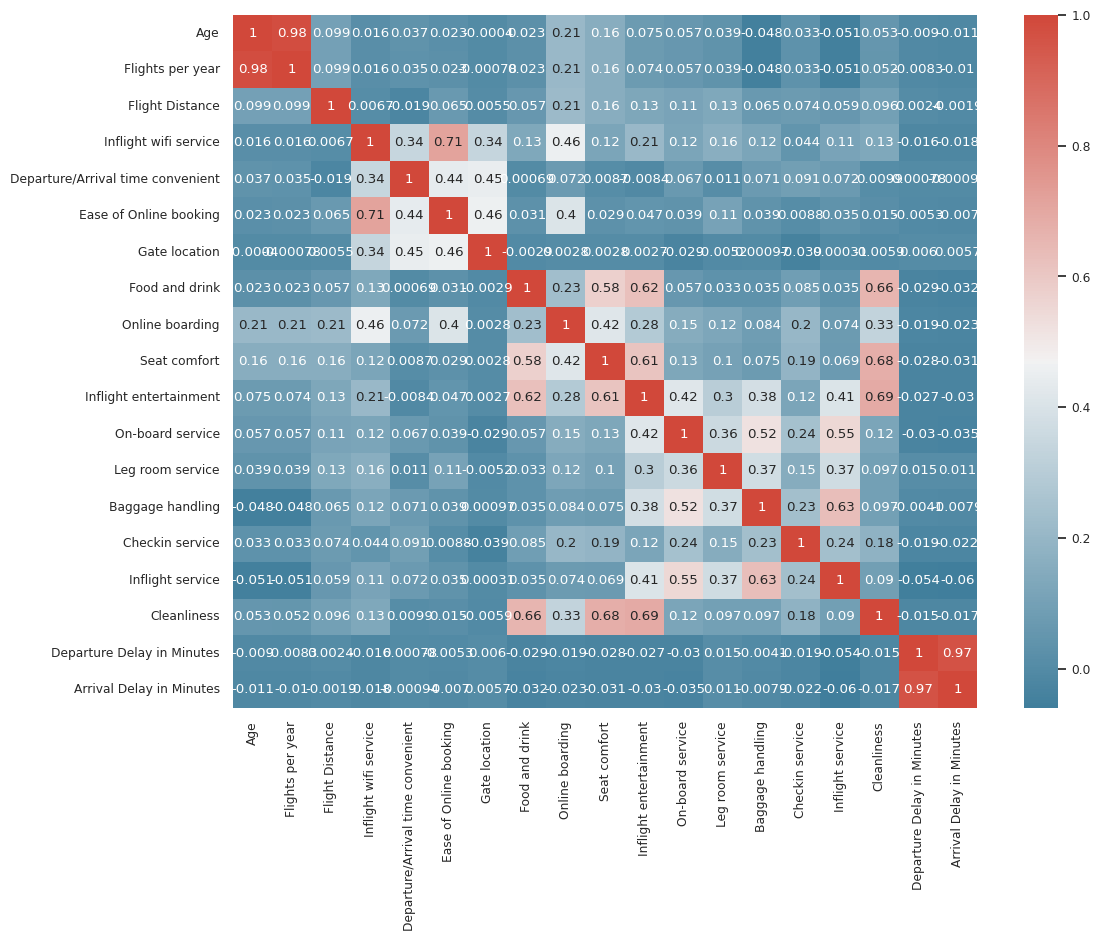

In [ ]:
plt.figure(figsize=(12,9)) #seleccionamos un tamaño de imagen mayor
sns.set(font_scale=0.8) #seleccionamos un tamaño de letra legible
# preparación del gráfico definiendo un mapa de colores
cmap = sns.diverging_palette(230, 15, as_cmap=True)
# graficamos la correlación
sns.heatmap(corr, annot=True,  cmap=cmap)
plt.show()

La matriz de correlaciones muestra una alta correlación entre las variables:

'Age' - 'Flights per year'

'Inflight wifi service' - 'Ease of online booking'

'Food and drink' - 'Seat confort' - 'Inflight entertainment' - 'Cleanliness'

'Departure delay in minutes' - 'Arrival delay in minutes'

### Matriz de dispersión


---

Estudio de las relaciones entre las variables mediante la matriz de dispersión.

Nos permite visualizar los diagramas de dispersión por pares de variables así como la distribución de probabilidades de cada variable sobre los elementos de la diagonal.







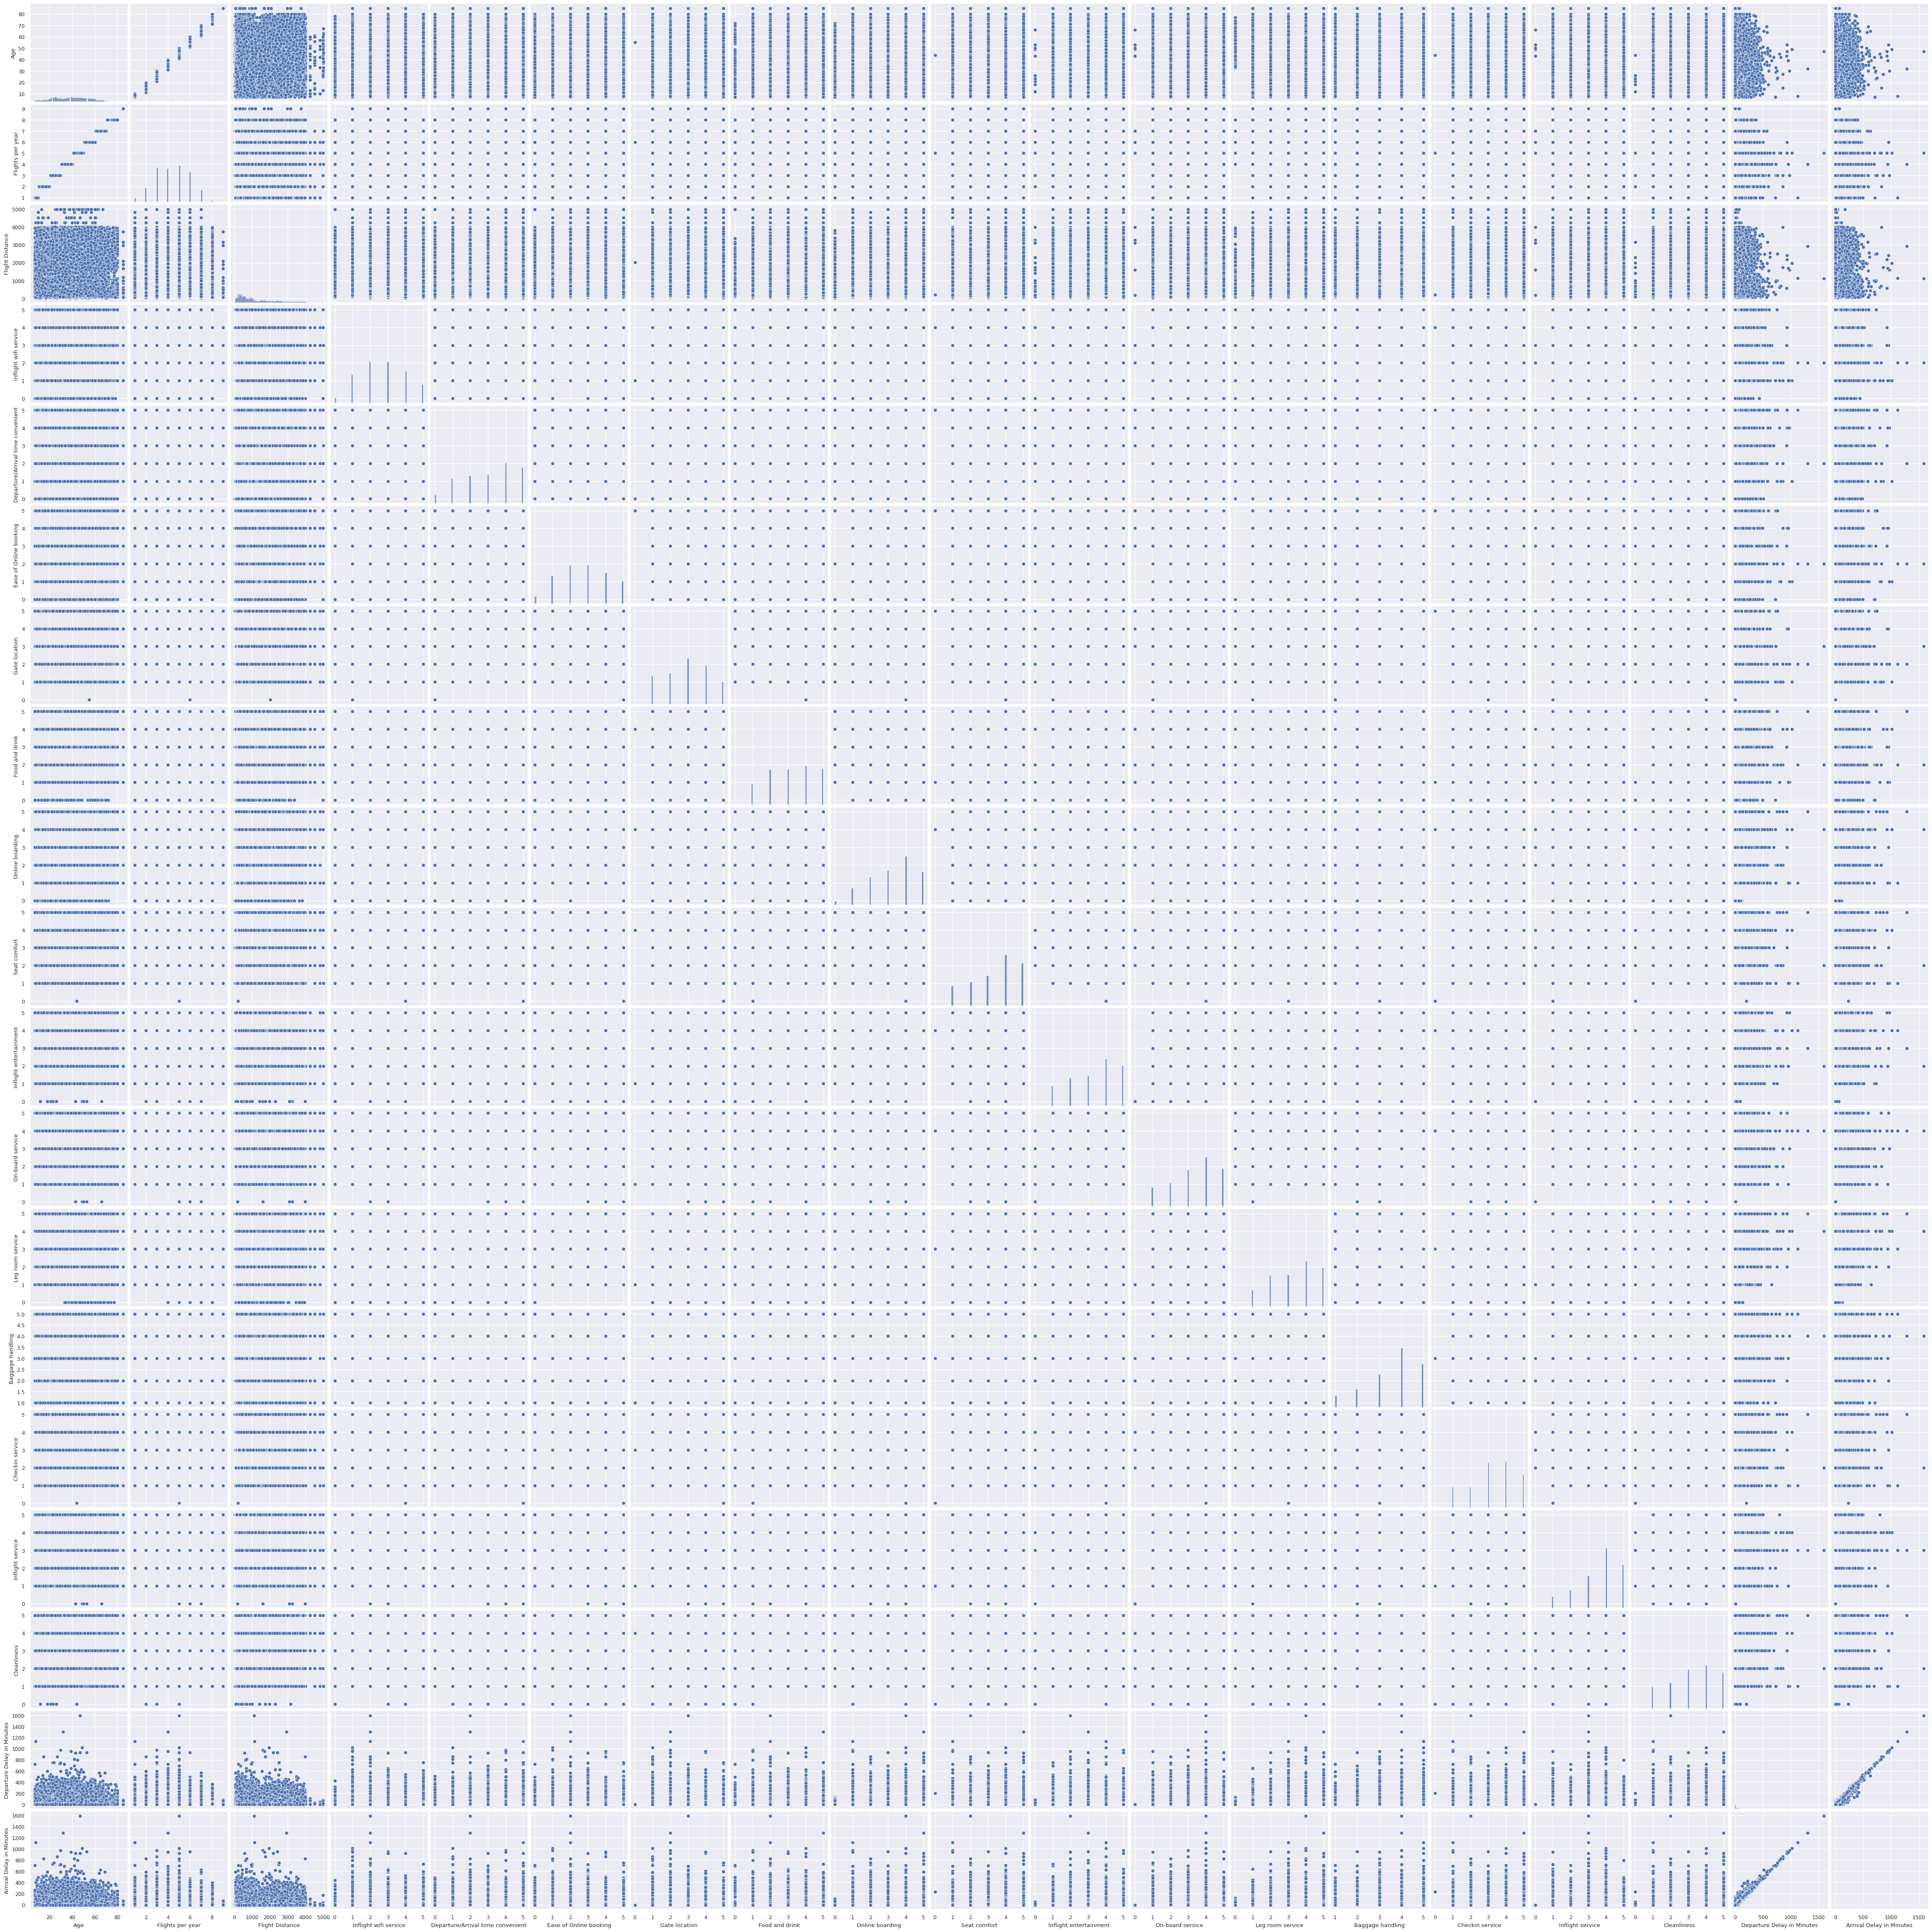

In [ ]:
#La ejecución es muy lenta, descomentar para ejecutar

#sns.pairplot(data_num)
#plt.show()

La matriz de dispersión muestra muy fuerte correlación en las variables:

'Age' - 'Flights per year'

'Departure delay in minutes' - 'Arrival delay in minutes'

### Análisis del coeficiente VIF


El coeficiente VIF (*Variance Inflation Factor*):

En general se considera que:
-  un valor de $VIF \ge 5$ representa una multicolinealidad moderada ($R^2=0.8$).
-  un valor de $VIF \ge 10$ representa una multicolinealidad severa ($R^2=0.9$).


**N.B:** Es necesario estandarizar el dataframe de las variables predictoras para calcular el coeficiente VIF.



In [ ]:
#Función para estandarizar las variables numéricas
def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [ ]:
dfvif_estan = data_num.apply(estandariza, axis=0)
dfvif_estan.head()

Age  Flights per year  Flight Distance  Inflight wifi service  \
0 -1.747955         -1.562306        -0.732182               0.204340   
1 -0.954270         -0.905413        -0.957756               0.204340   
2 -0.888130         -0.905413        -0.048440              -0.547949   
3 -0.954270         -0.905413        -0.629921              -0.547949   
4  1.426783          1.722158        -0.978810               0.204340   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           0.617263                0.173445      -1.546261   
1                          -0.692717                0.173445       0.018048   
2                          -0.692717               -0.539954      -0.764106   
3                           1.272253                1.600243       1.582357   
4                          -0.037727                0.173445       0.018048   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0        1.349862        -0.187036      1.181423                1.230782   
1       -1.657808        -0.187036     -1.850513               -1.767609   
2        1.349862         1.293657      1.181423                1.230782   
3       -0.905890        -0.927383     -1.092529               -1.018011   
4        0.597945         1.293657      1.181423               -0.268413   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0          0.479355         -0.266573          0.311761         0.547892   
1         -1.851468          1.252893         -0.535679        -1.821430   
2          0.479355         -0.266573          0.311761         0.547892   
3         -1.074527          1.252893         -0.535679        -1.821430   
4         -0.297586          0.493160          0.311761        -0.241882   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0          1.153941     1.304481                    0.270186   
1          0.304085    -1.740395                   -0.360213   
2          0.304085     1.304481                   -0.386480   
3          0.304085    -0.979176                   -0.097547   
4         -0.545772    -0.217957                   -0.386480   

   Arrival Delay in Minutes  
0                  0.075623  
1                 -0.236344  
2                 -0.392327  
3                 -0.158352  
4                 -0.392327

In [ ]:
nans_por_columna = dfvif_estan.isnull().sum()
print(nans_por_columna)

Age                                    0
Flights per year                      40
Flight Distance                        0
Inflight wifi service                 35
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [ ]:
dfvif_estan = dfvif_estan.dropna()

In [ ]:
vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(dfvif_estan.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan.sort_values(by=['VIF'],ascending=True, inplace=True)
df_vif_estan

Variable        VIF
2                     Flight Distance   1.095650
14                    Checkin service   1.214895
12                   Leg room service   1.302866
4   Departure/Arrival time convenient   1.438807
6                       Gate location   1.487688
11                   On-board service   1.759863
8                     Online boarding   1.878000
13                   Baggage handling   1.896317
15                   Inflight service   2.062911
7                      Food and drink   2.169356
9                        Seat comfort   2.380141
3               Inflight wifi service   2.386720
5              Ease of Online booking   2.643192
16                        Cleanliness   2.848777
10             Inflight entertainment   3.802826
17         Departure Delay in Minutes  14.660470
18           Arrival Delay in Minutes  14.673465
1                    Flights per year  28.291672
0                                 Age  28.357717

De este análisis preeliminar de correlación entre variables podemos concluir que existe una muy fuerte correlación para las variables:

'Arrival Delay in Minutes'  y 'Departure Delay in Minutes'

'Flights per year'	y 'Age'

Existe una correlación más débil entre las variables: Inflight entertainment - Cleanliness - Seat comfort - Food and drink

## Análisis de correlación sobre variables categóricas

**Primer análisis**: gráfico de barras apiladas para visualizar la relación entre tipo de viaje, clase de vuelo y satisfacción del cliente

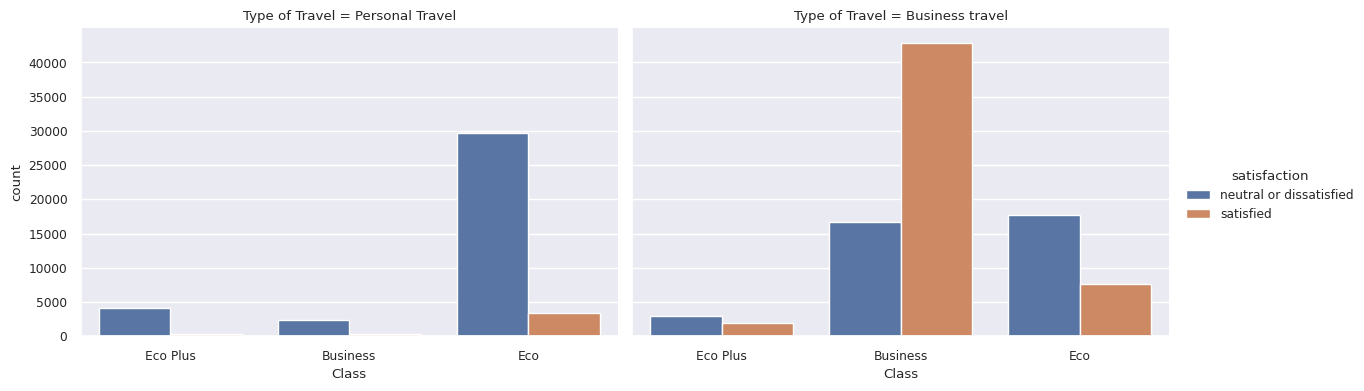

In [ ]:
# Gráfico
sns.catplot(x = "Class", hue = "satisfaction", col = "Type of Travel", data = data, kind = "count", height = 4, aspect = 1.5)

Lectura: Respecto al tipo de viaje se tienen en cuenta las siguientes consideraciones.
- Para el viaje personal, la clase económica acapara la mayoría de vuelos con una sorprendente inclinación hacia los viajeros insatisfechos o de postura neutral.
- Para los viajes de negocios, la clase predilecta, como es de esperarse, es la "Bussiness", con una inclinacción marcada hacia clientes satisfechos. En este tipo de viaje se concentran la mayoría de pasajeros a nivel global de la aerolinea.

**Segundo análisis**: Relación entre la atención en el vuelo y la satisfacción del cliente.

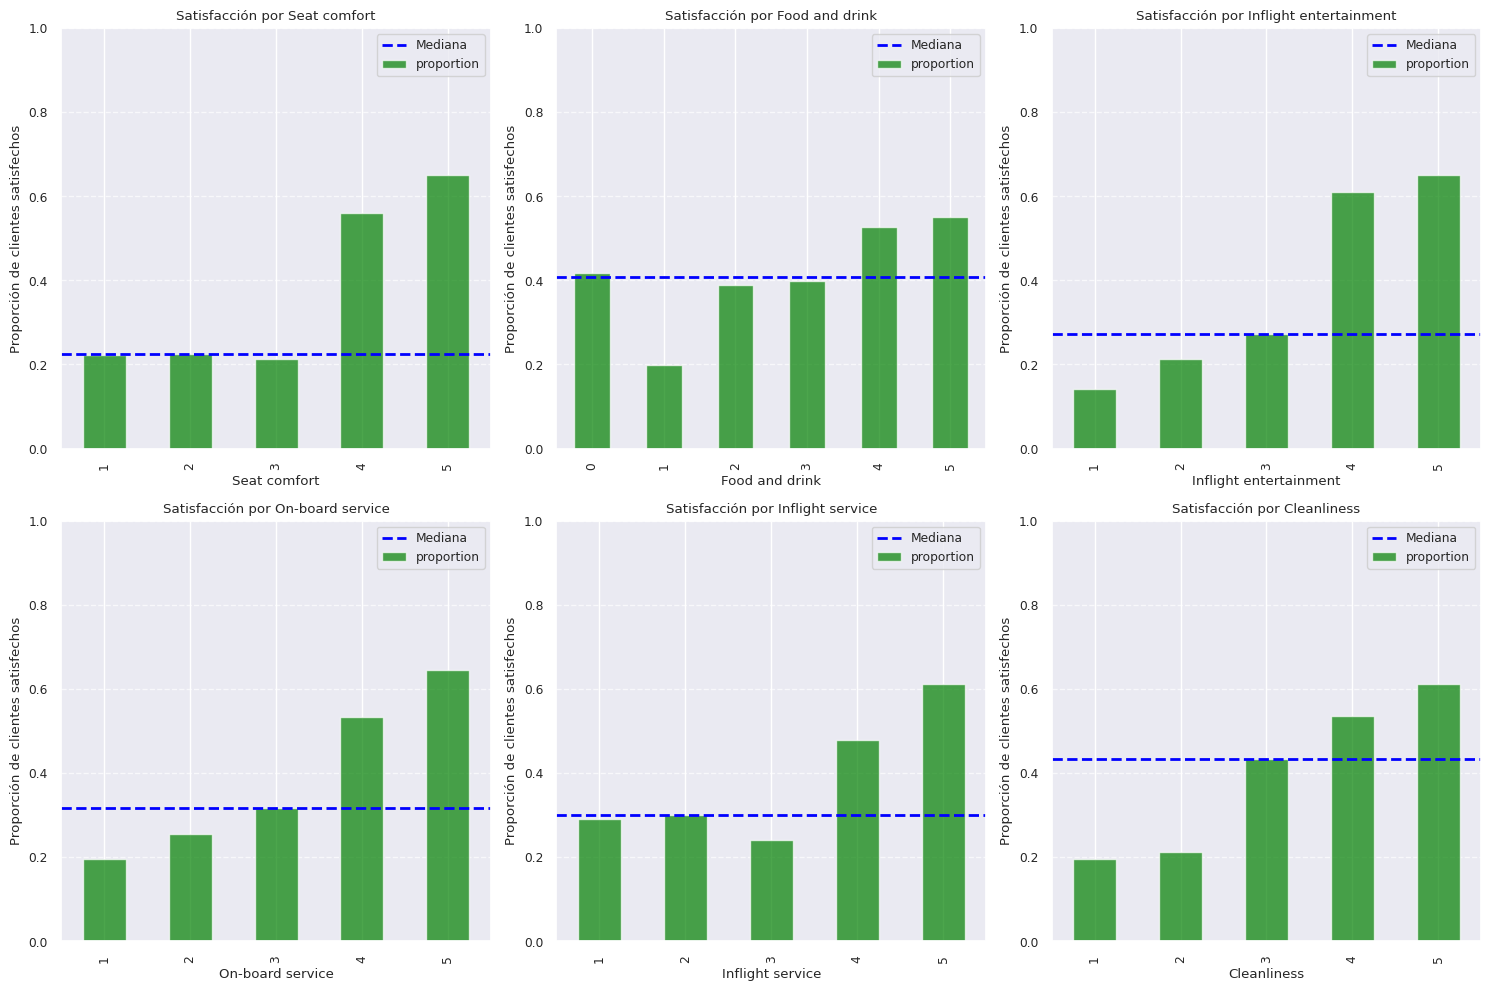

In [ ]:
# Gráfico
services_columns = ['Seat comfort',
                    'Food and drink',
                    'Inflight entertainment',
                    'On-board service',
                    'Inflight service',
                    'Cleanliness',
                    'satisfaction']

# Calcular la proporción de clientes satisfechos para cada nivel de calidad de servicio
satisfaction_by_service = {}
for column in services_columns[:-1]:
    satisfaction_by_service[column] = data.groupby(column)['satisfaction'].value_counts(normalize = True).loc[:, 'satisfied']

# Calcular la mediana de la proporción de clientes satisfechos para cada servicio
median_satisfaction = {service: satisfaction.median() for service, satisfaction in satisfaction_by_service.items()}

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
axes = axes.flatten()
for i, (service, satisfaction) in enumerate(satisfaction_by_service.items()):
    satisfaction.plot(kind = 'bar', ax = axes[i], color = ['green'], alpha = 0.7)
    axes[i].axhline(y = median_satisfaction[service], color = 'blue', linestyle = '--', linewidth = 2, label = 'Mediana')
    axes[i].set_title(f'Satisfacción por {service}')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Proporción de clientes satisfechos')
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis = 'y', linestyle = '--', alpha = 0.7)
    axes[i].legend()

plt.tight_layout()
plt.show()

Lectura: Para este análisis destacaría dos aspectos fundamentales.
1. El primero de ellos tiene que ver con la proporción de clientes satisfechos por calificación en cada factor de atención en el vuelo. Lo relevante en este gráfico es identificar cuales son los aspectos mejor valorados por los clientes y, del mismo, modo los que mas castigan a través de su calificación.
2. Por lo tanto, aquellos aspectos del vuelo en donde se evidencia esta marcada diferencia en la calificación para los distintos umbrales son: "Seat comfort" e "Inflight entertainment"

**Tercer análisis**: Calcular la proporción de clientes satisfechos para cada combinación de clase de vuelo y género.

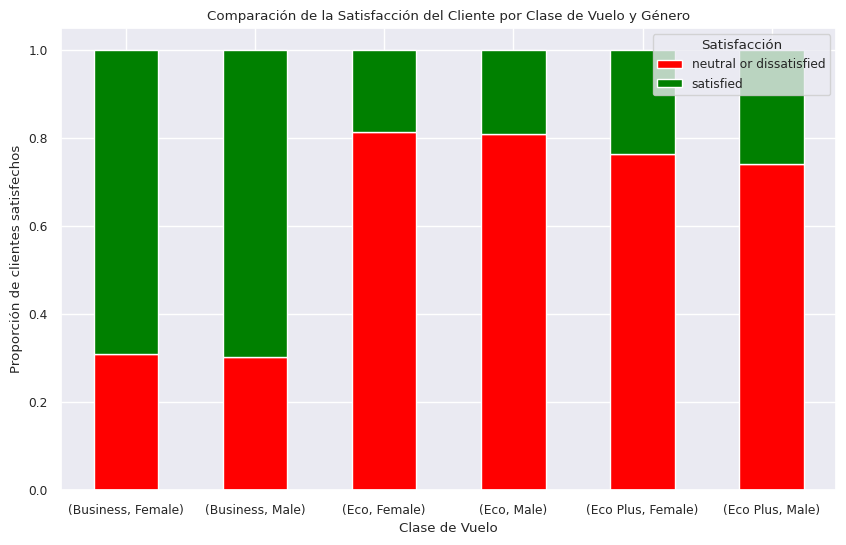

In [ ]:
# Gráfico
satisfaction_by_class_gender = data.groupby(['Class', 'Gender'])['satisfaction'].value_counts(normalize = True).unstack()

satisfaction_by_class_gender.plot(kind = 'bar', stacked = True, color = ['red', 'green'], figsize = (10, 6))
plt.xlabel('Clase de Vuelo')
plt.ylabel('Proporción de clientes satisfechos')
plt.title('Comparación de la Satisfacción del Cliente por Clase de Vuelo y Género')
plt.legend(title = 'Satisfacción', loc = 'upper right')
plt.xticks(rotation = 0)
plt.show()


Lectura: Tanto hombres como mujeres en la clase "Business" mantienen una alta proporción de clientes satisfechos. Entre la categoría "Eco" y "Eco Plus", esta última parece tener el peor desempeño.

**Cuarto Análisis**: Calcular el tiempo promedio de retraso en la llegada por categoría de satisfacción

<ipython-input-38-aa9a1835a67c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Arrival Delay in Minutes', y = 'satisfaction', data = average_arrival_delay_by_satisfaction, palette = 'viridis')


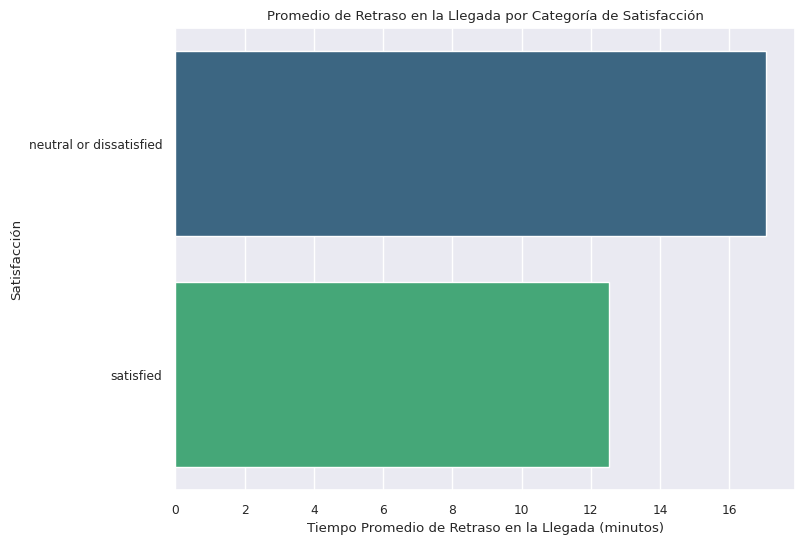

In [ ]:
# Gráfico
average_arrival_delay_by_satisfaction = data.groupby('satisfaction')['Arrival Delay in Minutes'].mean().reset_index()

plt.figure(figsize = (8, 6))
sns.barplot(x = 'Arrival Delay in Minutes', y = 'satisfaction', data = average_arrival_delay_by_satisfaction, palette = 'viridis')
plt.title('Promedio de Retraso en la Llegada por Categoría de Satisfacción')
plt.xlabel('Tiempo Promedio de Retraso en la Llegada (minutos)')
plt.ylabel('Satisfacción')
plt.show()

Lectura: Como es de esperar, el tiempo promedio de retraso en la llegada de los pasajeros es mayor para aquellos que dieron una calificación no deseada para la arolinea. Es una prueba de confirmación y permite medir el grado de importancia de esta variable, que, sin lugar a dudas, es fudamental.

# Train / Test Split

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)


# Limpieza de datos

## Tratamiento de missings

Existen valores nulos en las variables '*Arrival Delay in Minutes*', '*Flights per year*' y '*Inflight wifi service*'

A continuación voy a buscar alguna tendencia en la existencia de missings con Pandas Profiling


In [ ]:
datos_faltantes = data[data.isna().any(axis=1)]
datos_faltantes_arrival_delay = data[pd.isna(data['Arrival Delay in Minutes'])]
datos_faltantes_flights_per_year = data[pd.isna(data['Flights per year'])]
datos_faltantes_inflight_wifi_service = data[pd.isna(data['Inflight wifi service'])]

### 'Arrival Delay in Minutes'
Se realiza un análisis de datos faltantes en 'Arrival Delay in Minutes' con Pandas Profiling, no se observa ningún patrón recurrente en los registros que tienen missings en esa columna, se comparan con los datos de 'Departure Delay in Minutes', ya que se encuentran altamente correlacionados y no se encuentra ninguna tendencia aparente, además al contrario de lo que indica la intuición, no parece que los vuelos que llevan retraso se hayan imputado como nulos. Además esta columna se encuentra altamente correlacionada con la columna 'Departure delay in minutes'.
Se imputarán los valores faltantes de 'Arrival delay in minutes' haciendo una regresión de 'Departure delay in minutes'.

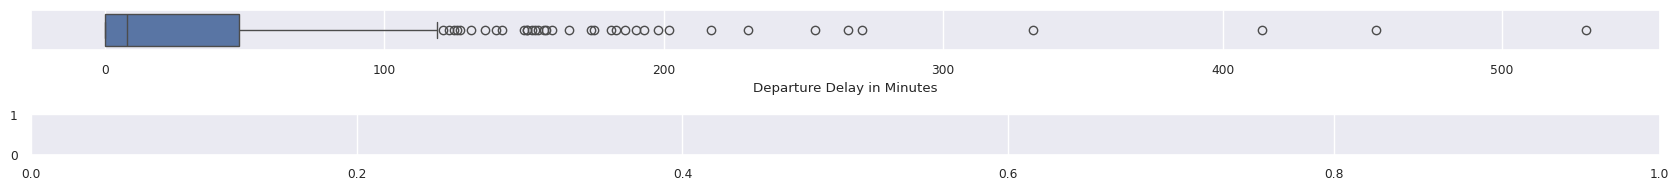

In [ ]:
# Creando figura y ejes para dos subplots
fig, axs = plt.subplots(2, 1, figsize=(17, 2))  # Ajusta el tamaño según sea necesario

# Gráfico de los registros cn nulos
sns.boxplot(data=datos_faltantes_arrival_delay['Departure Delay in Minutes'], orient='h', ax=axs[0])

# Gráfico de todo el dataset
# sns.boxplot(data=data_num['Departure Delay in Minutes'], orient='h', ax=axs[1])

axs[0].set_xlim(0, 1650)
axs[1].set_xlim(0, 1650)

plt.tight_layout()
plt.show()

In [ ]:
# Copiar el dataframe original en data_cleaned
data_cleaned = data.copy()

# 1. Preparar los datos
# Separar en conjunto con y sin valores faltantes
data_completo = data_train.dropna(subset=['Arrival Delay in Minutes'])
data_faltante = data_cleaned[data_cleaned['Arrival Delay in Minutes'].isnull()]

X_completo = data_completo[['Departure Delay in Minutes']]
y_completo = data_completo['Arrival Delay in Minutes']

# 2. Ajustar el modelo lineal
modelo = LinearRegression()
modelo.fit(X_completo, y_completo)

# 3. Predecir los valores faltantes
X_faltante = data_faltante[['Departure Delay in Minutes']]
predicciones = modelo.predict(X_faltante)

# 4. Asignar las predicciones a los valores faltantes en data_cleaned
data_cleaned.loc[data_cleaned['Arrival Delay in Minutes'].isnull(), 'Arrival Delay in Minutes'] = predicciones
data_cleaned['Arrival Delay in Minutes'] = data_cleaned['Arrival Delay in Minutes'].astype(int)


# Verificar los cambios
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flights per year                   129840 non-null  float64
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129845 non-null  float64
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 no

### '*Flights per year*'

Al realizar el análisis sobre los fatos faltantes en  Flights per year con pandas profiling no se observa ningún patrón aparente en la causa de que existan valores faltantes, los imputaremos con KNN
Para ello es buena práctica elegir unas pocas columnas que puedan aportar información sobre la variable, en este caso usamos las tres con mayor correlacionadas basado en de la matriz de correlación.

In [ ]:
columns_to_use = ['Flights per year', 'Age', 'Online boarding', 'Seat comfort']
data_subset = data_cleaned[columns_to_use]
data_train_subset = data_train[columns_to_use]

# Crear el imputador KNN. Puedes ajustar los parámetros según necesites.
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Ajustar el imputador al dataset y transformarlo para imputar los valores faltantes.
imputer.fit(data_train_subset)
data_imputed = imputer.transform(data_subset)

# Convertir los datos imputados de nuevo a un DataFrame para reemplazar los valores en el dataset original.
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_use)

# Si quieres reemplazar solo la columna 'Flights per year' en tu dataset original:
data_cleaned['Flights per year'] = data_imputed['Flights per year']

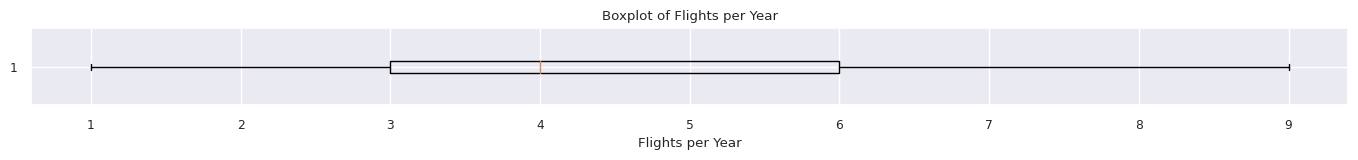

In [ ]:
plt.figure(figsize=(17, 1))
plt.boxplot(data_cleaned['Flights per year'], vert=False)  # vert=False para hacerlo horizontal
plt.title('Boxplot of Flights per Year')
plt.xlabel('Flights per Year')
plt.show()

In [ ]:
# Verificar los valores nulos en el DataFrame final
valores_nulos_count = data_cleaned.isnull().sum()
total = data_cleaned.isnull().sum().sort_values(ascending=False)
percent = ((data_cleaned.isnull().sum() / len(data_cleaned)) * 100).round(2).sort_values(ascending=False)
valores_nulos= pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje %'])


# Mostrar la cantidad de valores nulos por columna
print("Valores nulos por columna :")
print(valores_nulos)

Valores nulos por columna :
                                   Total  Porcentaje %
Inflight wifi service                 35          0.03
Gender                                 0          0.00
Seat comfort                           0          0.00
Arrival Delay in Minutes               0          0.00
Departure Delay in Minutes             0          0.00
Cleanliness                            0          0.00
Inflight service                       0          0.00
Checkin service                        0          0.00
Baggage handling                       0          0.00
Leg room service                       0          0.00
On-board service                       0          0.00
Inflight entertainment                 0          0.00
Online boarding                        0          0.00
Customer Type                          0          0.00
Food and drink                         0          0.00
Gate location                          0          0.00
Ease of Online booking               

### '*Inflight wifi service*'

Tampoco se observa ninguna tendencia que pueda explicar por qué existen datos faltantes en esta columna. Tirando de intuición podemos pensar que esos vuelos no contaban con wifi, de hecho es lo que vamos a hacer, asumir que esos valores son missing porque el vuelo no contaba con wifi.
En este caso, si vamos a utilizar modelos como XGBoost o Random Forest, podemos convertir estos valores en -1, ya que puede ser que aporten información relevante de esta manera.

In [ ]:
data_cleaned['Inflight wifi service'].fillna(-1, inplace=True)

Finalmente visualizamos que no queden valores nulos

In [ ]:
# Verificar los valores nulos en el DataFrame final
valores_nulos_count = data_cleaned.isnull().sum()
total = data_cleaned.isnull().sum().sort_values(ascending=False)
percent = ((data_cleaned.isnull().sum() / len(data_cleaned)) * 100).round(2).sort_values(ascending=False)
valores_nulos= pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje %'])


# Mostrar la cantidad de valores nulos por columna
print("Valores nulos por columna :")
print(valores_nulos)

Valores nulos por columna :
                                   Total  Porcentaje %
Gender                                 0           0.0
Customer Type                          0           0.0
Arrival Delay in Minutes               0           0.0
Departure Delay in Minutes             0           0.0
Cleanliness                            0           0.0
Inflight service                       0           0.0
Checkin service                        0           0.0
Baggage handling                       0           0.0
Leg room service                       0           0.0
On-board service                       0           0.0
Inflight entertainment                 0           0.0
Seat comfort                           0           0.0
Online boarding                        0           0.0
Food and drink                         0           0.0
Gate location                          0           0.0
Ease of Online booking                 0           0.0
Departure/Arrival time convenient    

## Tratamiento de outliers

En el análisis de valores atípicos se ha visto que existen outliers
en las columnas '*Flight distance*', '*Departure delay*' y '*Arrival Delay*', esta última colimna se ha eliminado en el paso anterior.

In [ ]:
def remove_noise(data, column_name):
  # Calculate the median and standard deviation of the column.
  median = data[column_name].median()
  std = data[column_name].std()

  # Define the upper and lower bounds for valid values.
  lower_bound = median - 3 * std
  upper_bound = median + 3 * std

  # Create a new DataFrame with the noise removed.
  clean_data = data.copy()
  clean_data[column_name] = np.clip(data[column_name], lower_bound, upper_bound)

  return clean_data

### 'Flight distance'
Trataremos los outliers asignandoles un valor extremo de 3 veces la desviación estandar. De esta manera no los despreciamos pero no tendrán un peso demasiado excesivo en el modelo final.


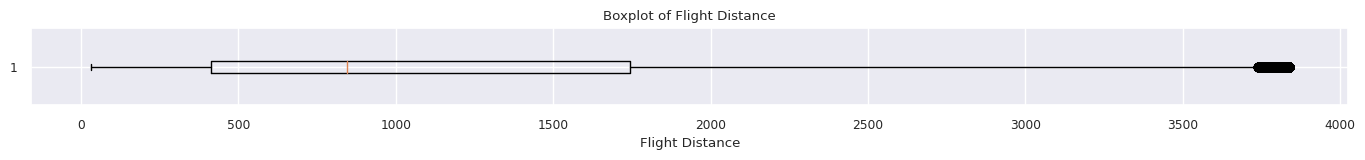

In [ ]:
# Remove noise from the 'Flight distance' column.
data_cleaned = remove_noise(data_cleaned, 'Flight Distance')

plt.figure(figsize=(17, 1))
plt.boxplot(data_cleaned['Flight Distance'], vert=False)  # vert=False para hacerlo horizontal
plt.title('Boxplot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()

### 'Departure delay'
Para tratar los outliers de esta variable nos fundamentaremos en las técnicas que utiliza la AESA para categorizarr la gravedad del retraso. En lugar de usar retrasos absolutos se usarán tramos.
Convertiremos la variable en categórica con 4 categorias: Sin retraso , Retraso leve (<30 min), Retraso medio (<2h), Retraso severo (<4h), Retraso Grave(>4h). Con esto resolvemos el problema de los outliers.

In [ ]:
# Convertir 'Departure Delay in Minutes' a categorías
def categorize_delay(minutes):
    if minutes == 0:
        return 0 #'Sin retraso'
    elif minutes < 30:
        return 1 #'Retraso leve'
    elif minutes < 120:
        return 2 #'Retraso medio'
    elif minutes < 240:
        return 3 #'Retraso severo'
    else:
        return 4 #'Retraso grave'

data_cleaned['Departure Delay'] = data_cleaned['Departure Delay in Minutes'].apply(categorize_delay)

data_cleaned.drop(['Departure Delay in Minutes'], axis = 1, inplace = True)

data_cleaned['Arrival Delay'] = data_cleaned['Arrival Delay in Minutes'].apply(categorize_delay)

data_cleaned.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)


# Verificar las primeras filas para asegurarnos de que la conversión fue correcta
data_cleaned.head()

Gender      Customer Type  Age   Type of Travel     Class  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    Male  disloyal Customer   25  Business travel  Business   
2  Female     Loyal Customer   26  Business travel  Business   
3  Female     Loyal Customer   25  Business travel  Business   
4    Male     Loyal Customer   61  Business travel  Business   

   Flights per year  Flight Distance  Inflight wifi service  \
0               2.0            460.0                    3.0   
1               3.0            235.0                    3.0   
2               3.0           1142.0                    2.0   
3               3.0            562.0                    2.0   
4               7.0            214.0                    3.0   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness             satisfaction  Departure Delay  \
0                 5            5  neutral or dissatisfied                1   
1                 4            1  neutral or dissatisfied                1   
2                 4            5                satisfied                0   
3                 4            2  neutral or dissatisfied                1   
4                 3            3                satisfied                0   

   Arrival Delay  
0              1  
1              1  
2              0  
3              1  
4              0

In [ ]:
data_cleaned['Departure Delay'].value_counts()

Departure Delay
0    73356
1    37881
2    15498
3     2548
4      597
Name: count, dtype: int64

## Encoding

En el conjunto de datos tenemos 4 variables binarias y una variable categórica ordinal. Es por ello que no es necesario un proceso complejo para codificar las variables.

In [ ]:
data_encoded = data_cleaned.copy()

# Encoding binary columns
data_encoded["Gender"] = (data_encoded["Gender"] == "Male").astype(int)
data_encoded["Customer Type"] = (data_encoded["Customer Type"] == "Loyal Customer").astype(int)
data_encoded["Type of Travel"] = (data_encoded["Type of Travel"] == "Business travel").astype(int)
data_encoded["satisfaction"] = (data_encoded["satisfaction"] == "satisfied").astype(int)

# Encoding ordinal column
data_encoded["Class"] = data_encoded["Class"].replace("Business", "2")
data_encoded["Class"] = data_encoded["Class"].replace("Eco Plus", "1")
data_encoded["Class"] = data_encoded["Class"].replace("Eco", "0")
data_encoded["Class"] = data_encoded["Class"].astype(int)

In [ ]:
data_encoded.head()

Gender  Customer Type  Age  Type of Travel  Class  Flights per year  \
0       1              1   13               0      1               2.0   
1       1              0   25               1      2               3.0   
2       0              1   26               1      2               3.0   
3       0              1   25               1      2               3.0   
4       1              1   61               1      2               7.0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0            460.0                    3.0                                  4   
1            235.0                    3.0                                  2   
2           1142.0                    2.0                                  2   
3            562.0                    2.0                                  5   
4            214.0                    3.0                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   satisfaction  Departure Delay  Arrival Delay  
0             0                1              1  
1             0                1              1  
2             1                0              0  
3             0                1              1  
4             1                0              0

In [ ]:
data_encoded.to_csv("data_processed.csv", index=False)

## Feature Engineering

### Matriz de Correlación

In [ ]:
corr = data_encoded.corr(method='pearson')
triang_sup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
variablescorr_drop = [column for column in triang_sup.columns if any(triang_sup[column] > 0.9)]

print("Variables a eliminar por poseer correlación superior a 0.9")
print(variablescorr_drop)

Variables a eliminar por poseer correlación superior a 0.9
['Flights per year']


<Figure size 640x480 with 0 Axes>

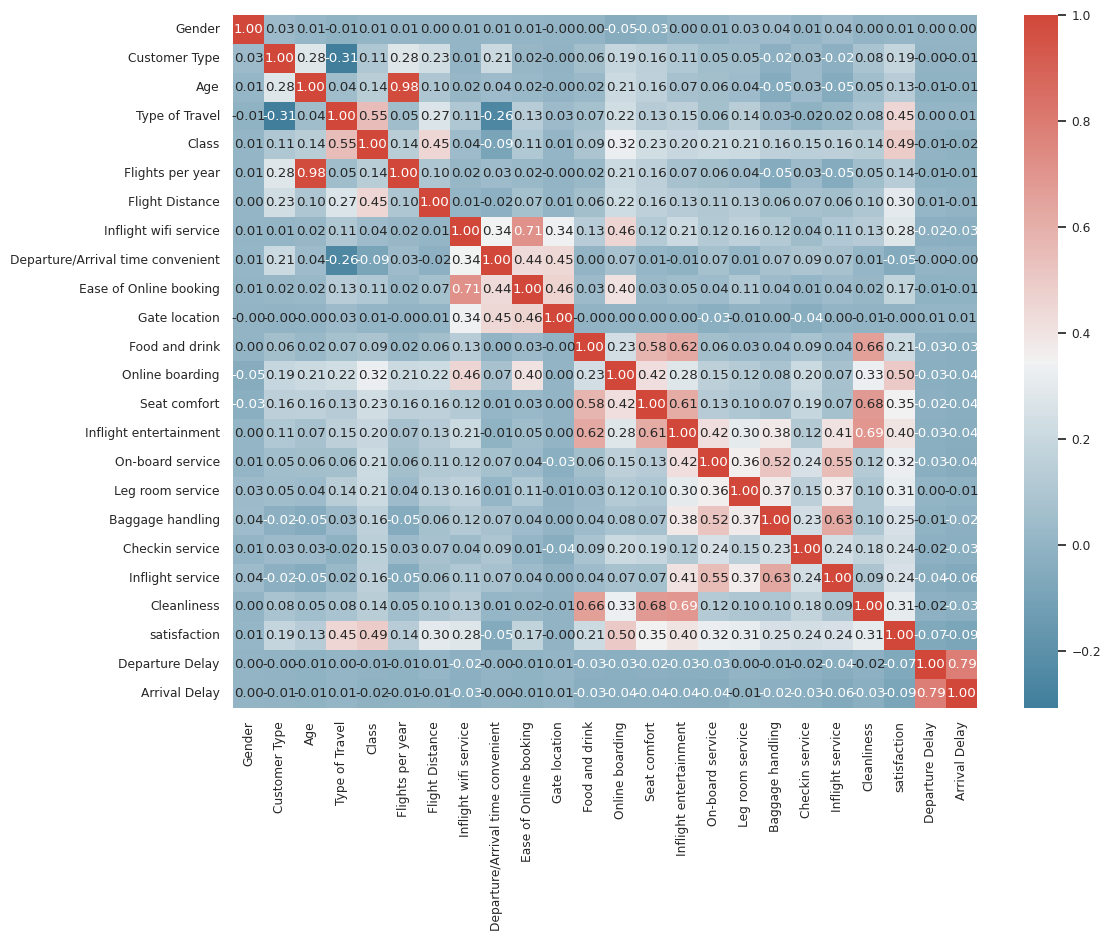

In [ ]:
plt.clf()
plt.figure(figsize=(12,9)) #seleccionamos un tamaño de imagen mayor
#sns.set(font_scale=0.8) #seleccionamos un tamaño de letra legible
# preparación del gráfico definiendo un mapa de colores
cmap = sns.diverging_palette(230, 15, as_cmap=True)
# graficamos la correlación
sns.heatmap(corr, annot=True,  cmap=cmap, fmt=".2f")
plt.show()

###Matriz de Dispersión

In [ ]:
# sns.pairplot(data_encoded)
plt.show()

### Análisis de coeficiente VIF

In [ ]:
dfvif_estan = data_encoded.apply(estandariza, axis=0)
dfvif_estan.head()

In [ ]:
vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(dfvif_estan.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan.sort_values(by=['VIF'],ascending=False, inplace=True)
df_vif_estan

El análsis complementario de VIF arroja la misma conclusión, la variable candidata a eliminación es 'Flights per year' dado que eliminar 'Age' en este contexto supone eliminar una variable de mayor valor informativo. Suponemos que esta colinealidad es propia del dataset y no representa la realidad.

### Feature importance con RF

In [ ]:
# Random oversampling para arreglar el desbalanceo
num_positive_samples = (data_encoded['satisfaction'] == 1).sum()
df_negative_samples = data_encoded[data_encoded['satisfaction'] == 0].sample(n=num_positive_samples, random_state=42)
data_train = pd.concat([data_encoded[data_encoded['satisfaction'] == 1], df_negative_samples])
data_train = data_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Dividimos en X e y
X = data_train.drop(columns=["satisfaction"])
y = data_train['satisfaction']

# Entrenamos el modelo RF
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

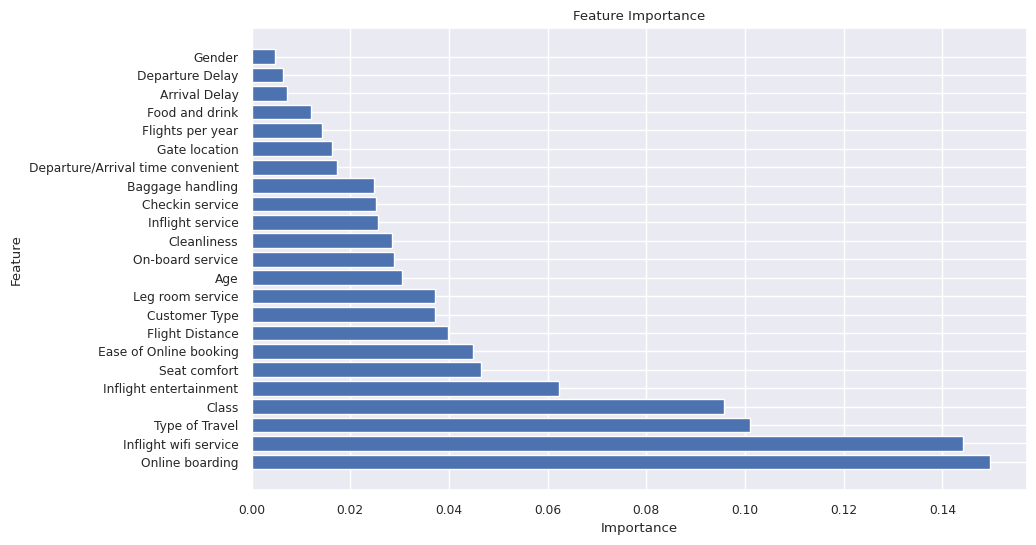

In [ ]:
# Mostramos la importancia de las variables
index_sort = np.argsort(model.feature_importances_)[::-1]

# Creamos un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), model.feature_importances_[index_sort], align='center')
plt.yticks(np.arange(len(X.columns)), X.columns[index_sort])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Feature importance con Lasso

In [ ]:
# Dividimos en X e y
X = data_train.drop(columns=["satisfaction"])
y = data_train['satisfaction']

lasso_results = []
col_importance = {col: 0 for col in X.columns}

# Valores de regularización a probar
reg_values = [0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for alpha in reg_values:

    # Ajustar el modelo Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)

    selected_features = list(X.columns[lasso.coef_ != 0])

    alpha_results = {}

    for col in X.columns:
        if col in selected_features:
            alpha_results[col] = "X"
            col_importance[col] = col_importance[col] + 1
        else:
            alpha_results[col] = ""

    lasso_results.append(alpha_results)

lasso_results = pd.DataFrame(lasso_results, index=reg_values)
lasso_results[sorted(lasso_results.columns, key=lambda x: -col_importance[x])]


Flight Distance Age Online boarding Class Inflight entertainment  \
0.001               X   X               X     X                      X   
0.005               X   X               X     X                      X   
0.010               X   X               X     X                      X   
0.025               X   X               X     X                      X   
0.050               X   X               X     X                      X   
0.075               X   X               X     X                      X   
0.100               X   X               X     X                      X   
0.250               X   X               X                                
0.500               X   X                                                
0.750               X   X                                                
1.000               X                                                    

      On-board service Leg room service Inflight wifi service  \
0.001                X                X                     X   
0.005                X                X                     X   
0.010                X                X                     X   
0.025                X                X                     X   
0.050                X                X                     X   
0.075                X                X                     X   
0.100                X                X                         
0.250                                                           
0.500                                                           
0.750                                                           
1.000                                                           

      Departure/Arrival time convenient Checkin service Type of Travel  \
0.001                                 X               X              X   
0.005                                 X               X              X   
0.010                                 X               X              X   
0.025                                 X               X              X   
0.050                                 X               X                  
0.075                                                                    
0.100                                                                    
0.250                                                                    
0.500                                                                    
0.750                                                                    
1.000                                                                    

      Seat comfort Cleanliness Arrival Delay Customer Type  \
0.001            X           X             X             X   
0.005            X           X             X             X   
0.010            X           X             X             X   
0.025            X           X             X                 
0.050                                                        
0.075                                                        
0.100                                                        
0.250                                                        
0.500                                                        
0.750                                                        
1.000                                                        

      Ease of Online booking Baggage handling Inflight service Gender  \
0.001                      X                X                X      X   
0.005                      X                X                X          
0.010                      X                X                X          
0.025                                                                   
0.050                                                                   
0.075                                                                   
0.100                                                                   
0.250                                                                   
0.500                                        

# Clustering

En este apartado se pretende generar información sobre los datos usando kmeans para segregar los datos en clusters. El objetivo es averiguar si se puede obtener información adicional realizando una agrupación no supervisada de los clientes.

In [ ]:
data_processed = data_encoded.copy()

## Modelo

In [ ]:
data_clustering = data_processed.drop(columns=["satisfaction"])

scaler = MinMaxScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)

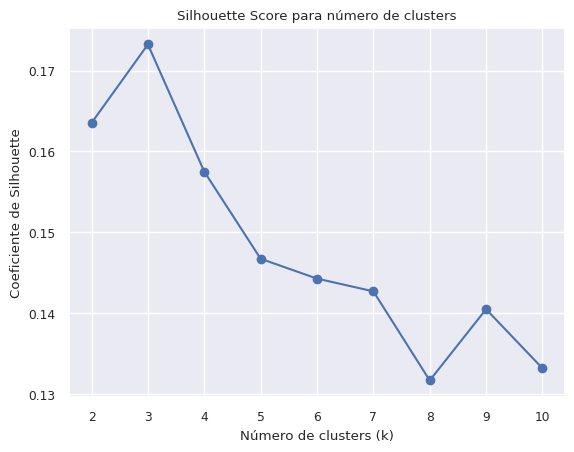

In [ ]:
#Gráfico de Silhouette
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_clustering_scaled)

    silhouette_avg = silhouette_score(data_clustering_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Silhouette Score para número de clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_clustering_scaled)
data_processed["Cluster"] = cluster_labels

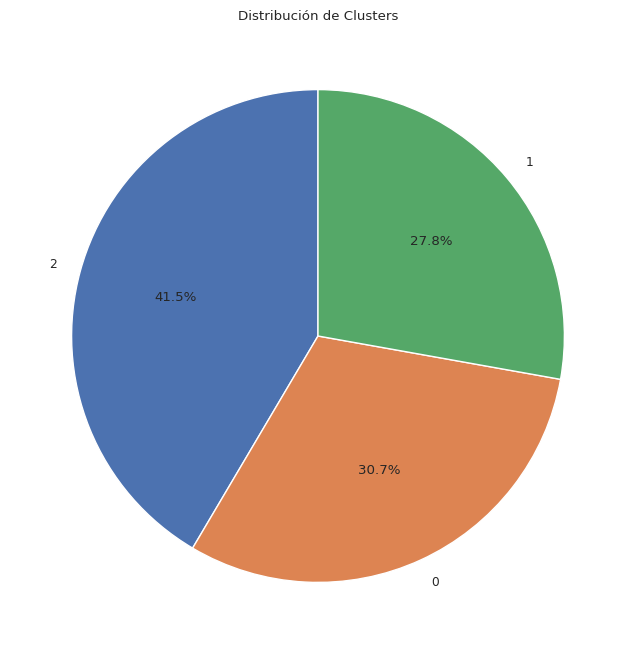

In [ ]:
# Estan razonablemente equilibrados: No hay clusters con muy pocas observaciones
cluster_counts = data_processed["Cluster"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Clusters')
plt.show()

## Análisis de los resultados

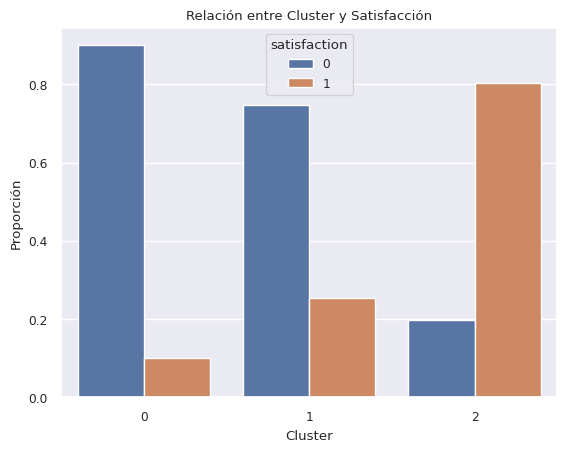

In [ ]:
# Cluster - Satisfaction
prop_satisfaction = data_processed.groupby("Cluster")["satisfaction"].value_counts(normalize=True).rename("prop").reset_index()

sns.barplot(data=prop_satisfaction, x="Cluster", y="prop", hue="satisfaction")
plt.title('Relación entre Cluster y Satisfacción')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.show()

Los clusters 0 y 1 están principalmente compuestos de clientes 'Neutrales on insatisfechos' y el cluster 2 está compuesto principalmente de clientes satisfechos.

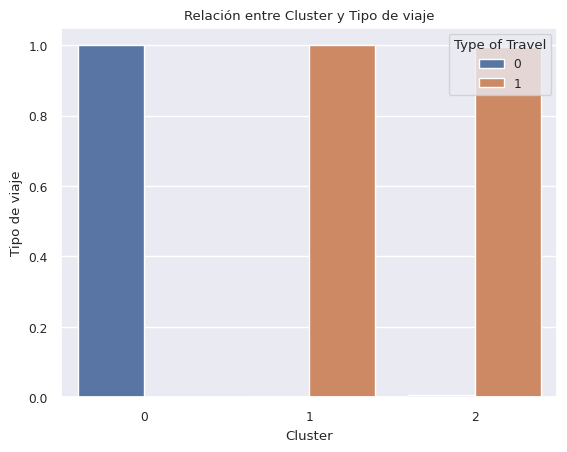

In [ ]:
# Cluster - Tipo de viaje
prop_satisfaction = data_processed.groupby("Cluster")["Type of Travel"].value_counts(normalize=True).rename("prop").reset_index()

sns.barplot(data=prop_satisfaction, x="Cluster", y="prop", hue="Type of Travel")
plt.title('Relación entre Cluster y Tipo de viaje')
plt.xlabel('Cluster')
plt.ylabel('Tipo de viaje')
plt.show()

Los clusters 0 y 1 están compuestos en su mayoría por clientes que viajan en clase Eco mientras el cluster 2 está principalmente compuesto por pasajeros que viajen en clase Business.

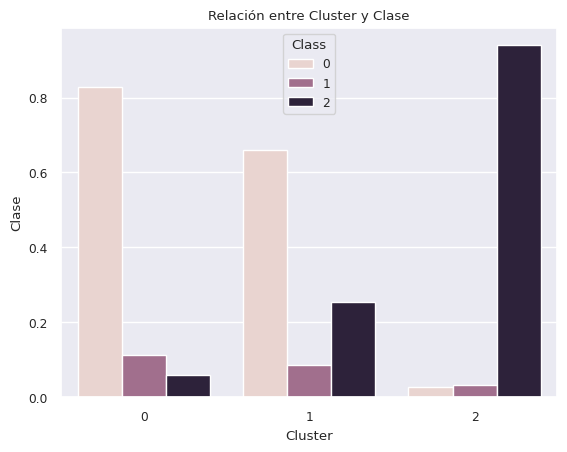

In [ ]:
# Cluster - Clase
prop_satisfaction = data_processed.groupby("Cluster")["Class"].value_counts(normalize=True).rename("prop").reset_index()

sns.barplot(data=prop_satisfaction, x="Cluster", y="prop", hue="Class")
plt.title('Relación entre Cluster y Clase')
plt.xlabel('Cluster')
plt.ylabel('Clase')
plt.show()

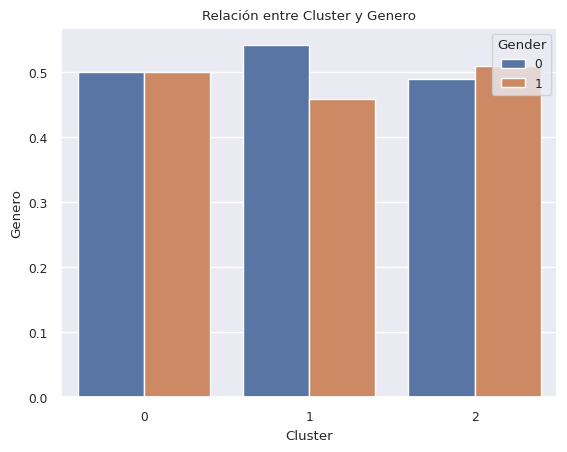

In [ ]:
# Cluster - Genero
prop_satisfaction = data_processed.groupby("Cluster")["Gender"].value_counts(normalize=True).rename("prop").reset_index()

sns.barplot(data=prop_satisfaction, x="Cluster", y="prop", hue="Gender")
plt.title('Relación entre Cluster y Genero')
plt.xlabel('Cluster')
plt.ylabel('Genero')
plt.show()

No parece haber una clara diferencia entre el género y los clusters

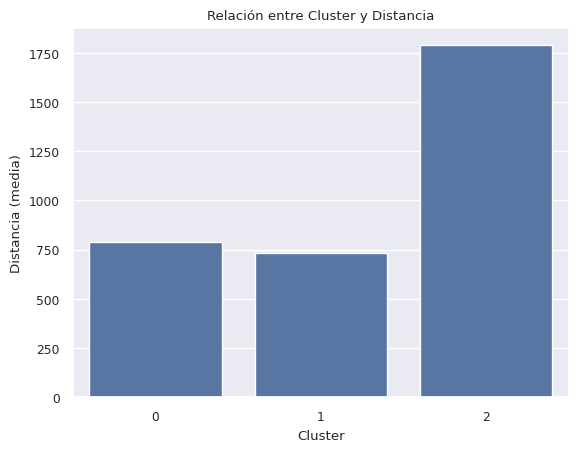

In [ ]:
# Cluster - Flight distance
mean_price_by_cluster = data_processed.groupby("Cluster")["Flight Distance"].mean().reset_index()

sns.barplot(data=mean_price_by_cluster, x="Cluster", y="Flight Distance")
plt.title('Relación entre Cluster y Distancia')
plt.xlabel('Cluster')
plt.ylabel('Distancia (media)')
plt.show()

Los clusters 0 y 1 hacen vuelos de distancia media, mientras que los viajeros del cluster 2 hacen viajes de casi el doble de distancia que los de los otros clusters.

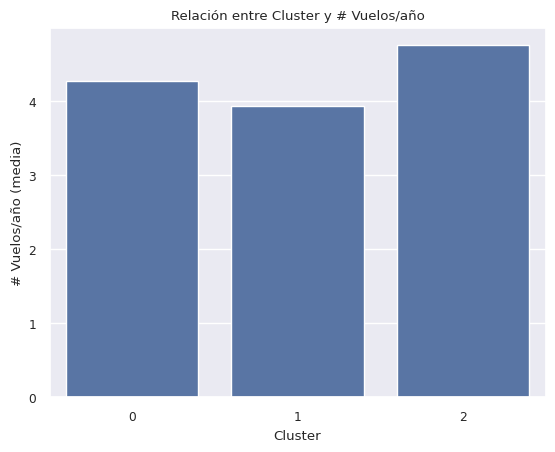

In [ ]:
# Cluster - Flight per year
mean_price_by_cluster = data_processed.groupby("Cluster")["Flights per year"].mean().reset_index()

sns.barplot(data=mean_price_by_cluster, x="Cluster", y="Flights per year")
plt.title('Relación entre Cluster y # Vuelos/año')
plt.xlabel('Cluster')
plt.ylabel('# Vuelos/año (media)')
plt.show()

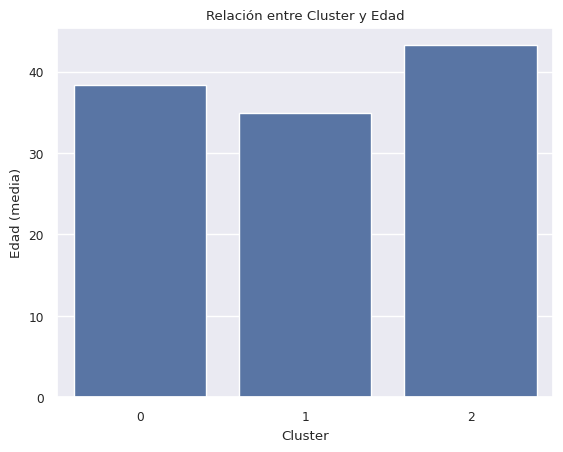

In [ ]:
# Cluster - Edad
mean_price_by_cluster = data_processed.groupby("Cluster")["Age"].mean().reset_index()

sns.barplot(data=mean_price_by_cluster, x="Cluster", y="Age")
plt.title('Relación entre Cluster y Edad')
plt.xlabel('Cluster')
plt.ylabel('Edad (media)')
plt.show()

# Clasificación

## Random Forest

### Test train split

In [ ]:
variables_eliminadas = [ 'Leg room service', 'Departure/Arrival time convenient', 'Customer Type', 'Arrival Delay', 'Ease of Online booking', 'Baggage handling', 'Inflight service', 'Gender', 'Flights per year', 'Gate location', 'Food and drink', 'Departure Delay']

In [ ]:
data_random_forest = data_processed.drop(variables_eliminadas, axis=1)

In [ ]:
X = data_random_forest.drop(['satisfaction'], axis=1)

y = data_random_forest['satisfaction']

In [ ]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((87019, 12), (42861, 12))

### Selección variables RF


En esta sección se evaluarán y seleccionarán las variables para realizar Random Forest. Esta selección es útil para optimizar el rendimiento del modelo, reducir el tiempo de entrenamiento y mejorar la interpretabilidad de los resultados. Al identificar y utilizar solamente las variables más relevantes, se puede disminuir el riesgo de sobreajuste, permitiendo que el modelo generalice mejor a datos nuevos que no ha visto antes.

Para la selección de variables, se utilizará Random Forest Importance y Lasso Feature Importance. La idea es eliminar aquellas variables que tienen poco impacto en la predicción o que son redundantes, manteniendo las que verdaderamente contribuyen a la capacidad predictiva del modelo.

Para la selección de variables, se partirá con aquellas que tengan más de 0.02 feature importance con RF FI y más de 0.025 en FI con Lasso.

Estas variables son: ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class', 'Inflight entertainment', 'Seat comfort', 'Flight Distance', 'On-board service', 'Age', 'Cleanliness' , 'Checkin service'] ordenadas de mayor a menor importancia según RFFE.

Posteriormente se mediara la precisión del modelo eliminando varias variables para detectar si el modelo puede verse beneficiado de eliminar más variables.

Una vez seleccionadas las variables más significativas, se procederá a entrenar el modelo de Random Forest, ajustando parámetros como n_estimators y max_depth para optimizar la precisión y el rendimiento del modelo. Además, se realizarán pruebas de validación cruzada para asegurar que el modelo es robusto y realiza predicciones fiables en distintos subconjuntos de datos.

In [ ]:
#Función para evaluar como afecta la eliminación recursiva de variables al modelo

def evaluate_feature_removal(X_train, X_test, y_train, y_test, variables_a_eliminar, n_estimators=100):

    # Primero se evalua el modelo sin eliminar ninguna característica
    rfc_full = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rfc_full.fit(X_train, y_train)
    y_pred_full = rfc_full.predict(X_test)
    accuracy_full = accuracy_score(y_test, y_pred_full)
    print(f'Precisión del modelo inicial: {accuracy_full:.4f}')

    X_train_reduced = X_train.copy()
    X_test_reduced = X_test.copy()

    # Bucle para entrenar un modelo excluyendo las variables acumulativamente
    for variable in variables_a_eliminar:
        X_train_reduced.drop(variable, axis=1, inplace=True)
        X_test_reduced.drop(variable, axis=1, inplace=True)

        rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
        rfc.fit(X_train_reduced, y_train)
        y_pred = rfc.predict(X_test_reduced)

        accuracy = accuracy_score(y_test, y_pred)
        print(f'Precisión del modelo sin la variable {variable} (cumulative): {accuracy:.4f}')

In [ ]:
variables_a_eliminar = ['Cluster','Checkin service', 'Cleanliness', 'Age', 'On-board service', 'Flight Distance', 'Seat comfort', 'Inflight entertainment']
evaluate_feature_removal(X_train, X_test, y_train, y_test, variables_a_eliminar)


Precisión del modelo inicial: 0.9457
Precisión del modelo sin la variable Cluster (cumulative): 0.9431
Precisión del modelo sin la variable Checkin service (cumulative): 0.9388
Precisión del modelo sin la variable Cleanliness (cumulative): 0.9351
Precisión del modelo sin la variable Age (cumulative): 0.9200
Precisión del modelo sin la variable On-board service (cumulative): 0.9127
Precisión del modelo sin la variable Flight Distance (cumulative): 0.9306
Precisión del modelo sin la variable Seat comfort (cumulative): 0.9239
Precisión del modelo sin la variable Inflight entertainment (cumulative): 0.8944


Tras realizar varias pruebas se ha observad que la clusterización no aporta información relevante a la hora de mejorar la precisión de la clusterización mediante RF. Lo mismo ocurre con las variables ['Checkin service', 'Cleanliness', 'Age', 'On-board service', Flight Distance'], sin embargo eliminar las variable 'Seat Confort' y 'Inflight entertaiment', reduce considerablemente la precisión del clasificador.

```
Precisión del modelo inicial: 0.9457
Precisión del modelo sin la variable Cluster (cumulative): 0.9431
Precisión del modelo sin la variable Checkin service (cumulative): 0.9388
Precisión del modelo sin la variable Cleanliness (cumulative): 0.9351
Precisión del modelo sin la variable Age (cumulative): 0.9200
Precisión del modelo sin la variable On-board service (cumulative): 0.9127
Precisión del modelo sin la variable Flight Distance (cumulative): 0.9306
Precisión del modelo sin la variable Seat comfort (cumulative): 0.9239
Precisión del modelo sin la variable Inflight entertainment (cumulative): 0.8944
```



### Modelo final

Finalmente se realiza un modelo de clasificación mediante random forest eliminando todas las variables no relevantes. Las variables son: ['Online boarding', 'Inflight wifi service', 'Type of Travel', 'Class', 'Inflight entertainment', 'Seat comfort']

Para ello se buscará la combinación optima de parámetros usando GridSearchCV

In [ ]:
variables_eliminadas = ['Cluster','Checkin service', 'Cleanliness', 'Age', 'On-board service', 'Flight Distance']

In [ ]:
X_train.drop(variables_eliminadas, axis=1, inplace=True)
X_test.drop(variables_eliminadas, axis=1, inplace=True)

In [ ]:
# Definir los parámetros que deseamos variar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Instanciar el modelo de RandomForest
rfc = RandomForestClassifier(random_state=0)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por GridSearchCV
best_rfc = grid_search.best_estimator_

# Predecir utilizando el mejor modelo
y_pred = best_rfc.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión encontrada: {accuracy:.4f}')
print(f'Mejores parámetros: {grid_search.best_params_}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejor Precisión encontrada: 0.9307
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


Según Grid Search los mejores parámetros para el modelo son los siguientes:

```
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejor Precisión encontrada: 0.9307
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
```

Si comparamos el accuracy del modelo con los parámetros optimizados respecto al modelo original (0.9306 vs 0.9307), se observa que el aumento de precisión es mínimo.


In [ ]:
best_n_estimators = 300
best_max_depth = None
best_min_samples_split = 2
best_min_samples_leaf = 4

In [ ]:
# Modelo final
rfc = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=0
)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo final: {accuracy:.4f}')

Precisión del modelo final: 0.9307


### Matriz de confusión

In [ ]:
# Muestra la matriz de confusión

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[22935  1261]
 [ 1709 16956]]


<Axes: >

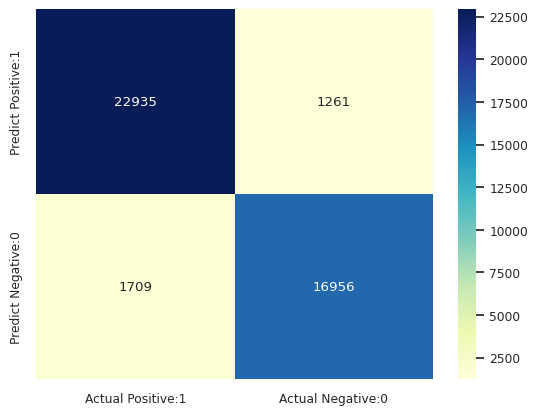

In [ ]:
# Visualización del mapa de calor de la matriz de confusión

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Reporte de clasificación

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     24196
           1       0.93      0.91      0.92     18665

    accuracy                           0.93     42861
   macro avg       0.93      0.93      0.93     42861
weighted avg       0.93      0.93      0.93     42861




El modelo evaluado muestra una precisión general, un recall y un f1-score de entre 0.91 y 0.95 en ambas clases, lo cual indica un rendimiento equilibrado y alto. La clase 0, con un soporte de 24196, tiene un recall ligeramente superior al de la clase 1, que cuenta con un soporte de 18665. Este desempeño robusto sugiere que el modelo es efectivo para distinguir entre las dos clases evaluadas.

## XGBoost

In [ ]:
# Definir los parámetros para XGBoost
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 6],
    'min_child_weight': [1, 5],
    'learning_rate': [0.01, 0.05],
    'gamma': [0, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Crear el modelo XGBoost
xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por GridSearchCV
best_xgbc = grid_search.best_estimator_

# Predecir utilizando el mejor modelo
y_pred = best_xgbc.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión encontrada: {accuracy:.4f}')
print(f'Mejores parámetros: {grid_search.best_params_}')

# Modelo final con los mejores parámetros
best_xgbc.fit(X_train, y_train)
y_pred = best_xgbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo final: {accuracy:.4f}')

# Muestra la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

# Visualización del mapa de calor de la matriz de confusión
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits


### Lectura XGBOOST

El modelo presenta resultados similares a los obtenidos con el algoritmo de Random Forest, con una precisión y sensibilidad (recall) de 0.93 en ambas clases. En términos de precisión, el modelo predice con un 93% de exactitud tanto para la clase de usuarios insatisfechos (clase 0) como para la de usuarios satisfechos (clase 1). La sensibilidad alcanza el 95% para los usuarios insatisfechos y el 91% para los satisfechos, indicando una mayor eficacia en identificar correctamente a los insatisfechos.

La métrica F1-score, que engloba la precisión y la sensibilidad, se sitúa en 0.94 para los insatisfechos y 0.92 para los satisfechos, lo que evidencia un balance adecuado entre estas métricas para cada segmento de usuario.

## Redes neuronales

## Data preparation

In [ ]:
variables_eliminadas = [ 'Leg room service', 'Departure/Arrival time convenient', 'Customer Type', 'Arrival Delay', 'Ease of Online booking', 'Baggage handling', 'Inflight service', 'Gender', 'Flights per year', 'Gate location', 'Food and drink', 'Departure Delay']

In [ ]:
data_dnn = data_processed.drop(variables_eliminadas, axis=1)

In [ ]:
X = data_dnn.drop('satisfaction', axis=1)
y = data_dnn['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((83123, 11), (25976, 11))

## Model

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(11,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=50, batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8590 - loss: 0.3380 - val_accuracy: 0.8693 - val_loss: 0.3131
Epoch 2/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8700 - loss: 0.3074 - val_accuracy: 0.8395 - val_loss: 0.4116
Epoch 3/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8782 - loss: 0.2883 - val_accuracy: 0.8699 - val_loss: 0.3139
Epoch 4/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8782 - loss: 0.2834 - val_accuracy: 0.8860 - val_loss: 0.2819
Epoch 5/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8871 - loss: 0.2710 - val_accuracy: 0.8749 - val_loss: 0.3004
Epoch 6/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8837 - loss: 0.2707 - val_accuracy: 0.8780 - val_loss: 0.2826
Epoch 7/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8919 - loss: 0.2544 - val_accuracy: 0.8839 - val_loss: 0.2873
Epoch 8/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8912 - loss: 0.2

In [ ]:
model.save_weights('model.weights.h5')

## Train Evaluation

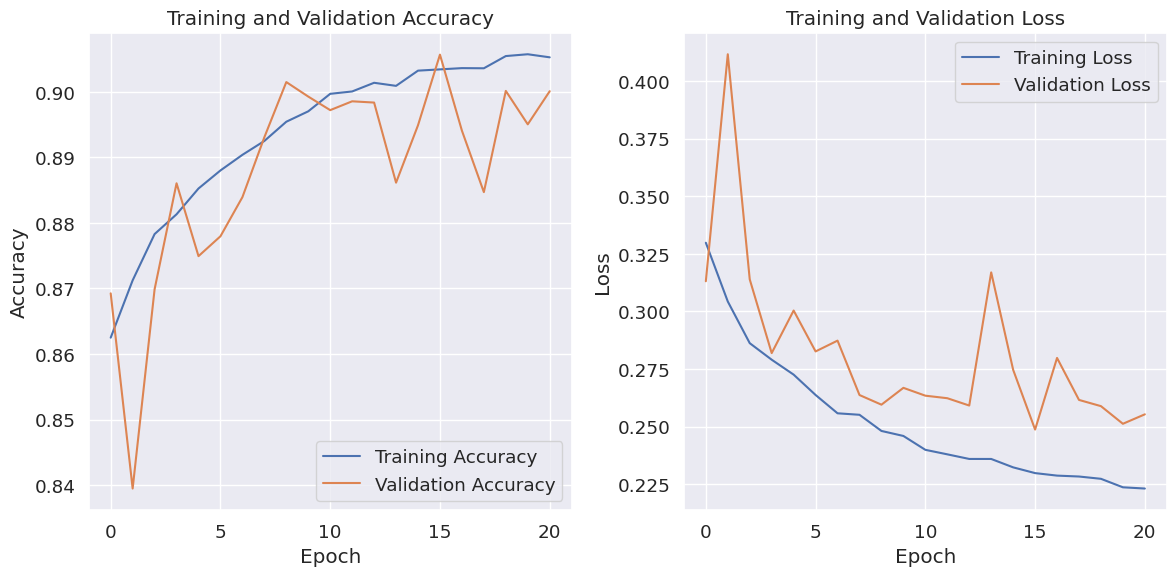

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluación

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Precisión en el conjunto de prueba:', test_acc)

812/812 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9080 - loss: 0.2376
Precisión en el conjunto de prueba: 0.907260537147522


812/812 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


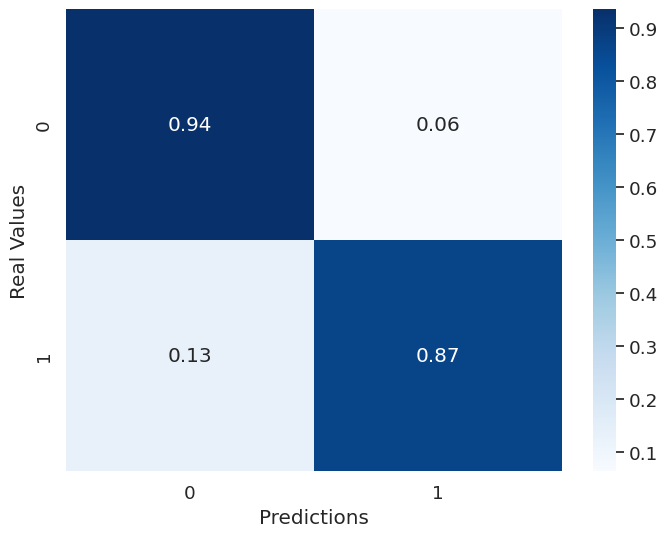

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)


conf_matrix = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()


## Model 2


In [ ]:
model_2 = Sequential([
    Dense(512, activation='relu', input_shape=(11,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_2 = model_2.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=50, batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.7578 - loss: 0.5395 - val_accuracy: 0.7933 - val_loss: 0.5680
Epoch 2/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.8386 - loss: 0.3857 - val_accuracy: 0.8182 - val_loss: 0.4113
Epoch 3/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.8655 - loss: 0.3179 - val_accuracy: 0.8742 - val_loss: 0.2935
Epoch 4/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8768 - loss: 0.2921 - val_accuracy: 0.8653 - val_loss: 0.3894
Epoch 5/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8837 - loss: 0.2771 - val_accuracy: 0.8888 - val_loss: 0.2643
Epoch 6/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8857 - loss: 0.2696 - val_accuracy: 0.9004 - val_loss: 0.2558
Epoch 7/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8874 - loss: 0.2651 - val_accuracy: 0.8992 - val_loss: 0.2364
Epoch 8/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8972 -

In [ ]:
model_2.save_weights('model2.weights.h5')

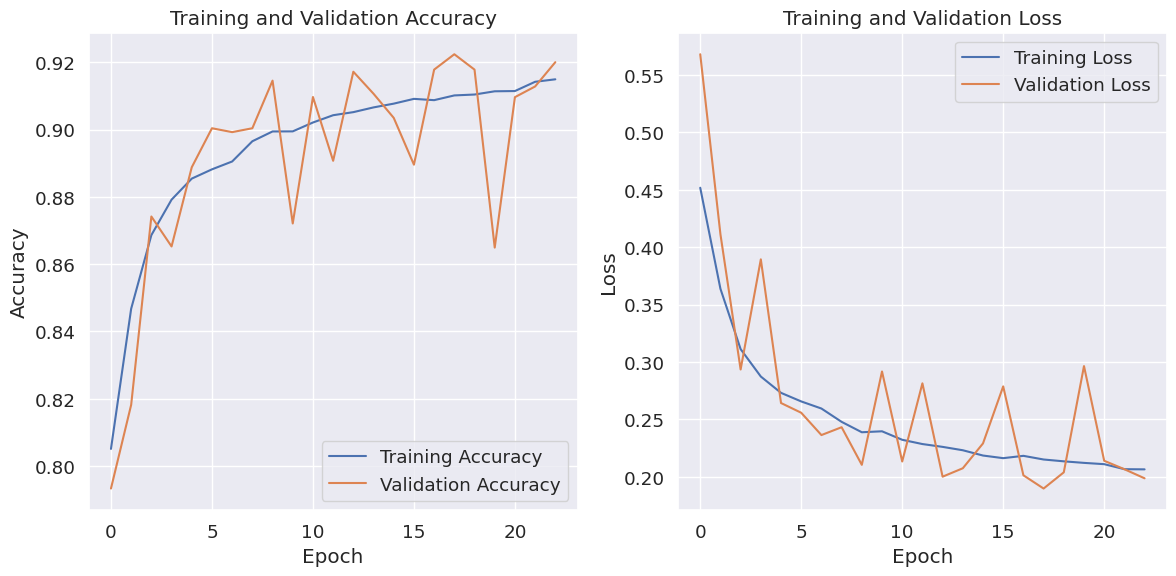

In [ ]:
train_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print('Precisión en el conjunto de prueba:', test_acc)


812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9221 - loss: 0.1848
Precisión en el conjunto de prueba: 0.9224668741226196


812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


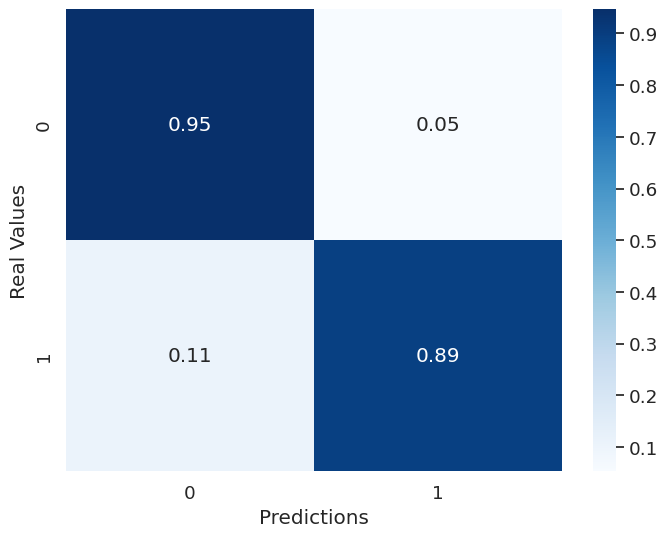

In [ ]:
y_pred = np.argmax(model_2.predict(X_test), axis=-1)


conf_matrix = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()


## Model 3


In [ ]:
model_3 = Sequential([
    Dense(512, activation='relu', input_shape=(11,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_3.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_3 = model_3.fit(X_train, y_train,  validation_data=(X_val, y_val), epochs=50, batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.6660 - loss: 0.6595 - val_accuracy: 0.8468 - val_loss: 0.3729
Epoch 2/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8352 - loss: 0.3956 - val_accuracy: 0.7651 - val_loss: 0.4957
Epoch 3/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.8396 - loss: 0.3790 - val_accuracy: 0.7859 - val_loss: 0.4559
Epoch 4/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8623 - loss: 0.3266 - val_accuracy: 0.7850 - val_loss: 0.5330
Epoch 5/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.8714 - loss: 0.3018 - val_accuracy: 0.8163 - val_loss: 0.3826
Epoch 6/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.8774 - loss: 0.2856 - val_accuracy: 0.8933 - val_loss: 0.2498
Epoch 7/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8800 - loss: 0.2796 - val_accuracy: 0.8505 - val_loss: 0.3533
Epoch 8/50
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.8875 -

In [ ]:
model_3.save_weights('model3.weights.h5')

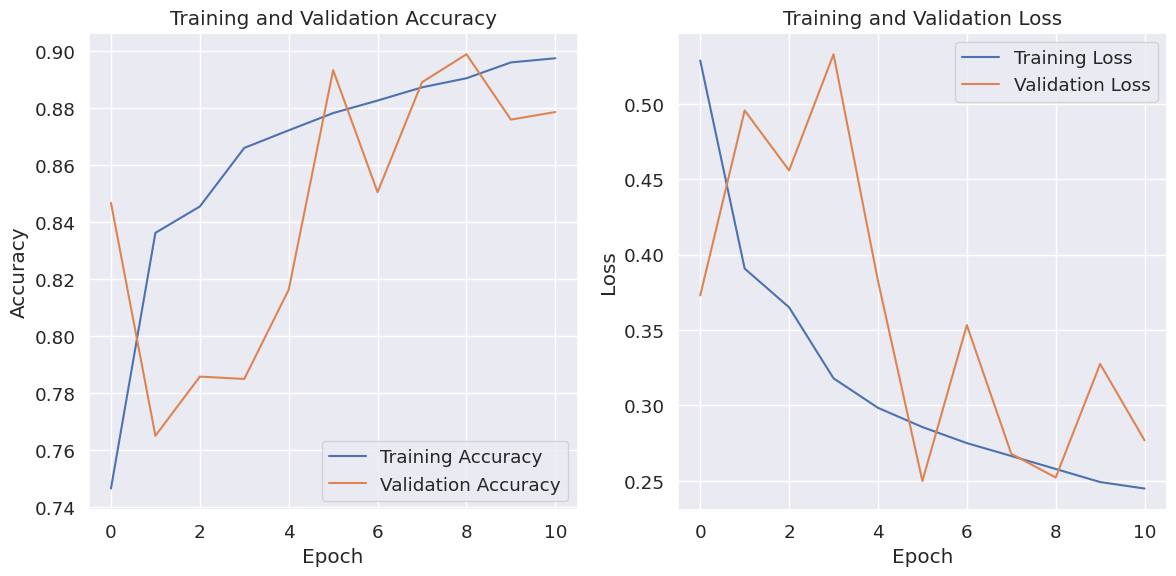

In [ ]:
train_acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
train_loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print('Precisión en el conjunto de prueba:', test_acc)


812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8948 - loss: 0.2468
Precisión en el conjunto de prueba: 0.8935940861701965


812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


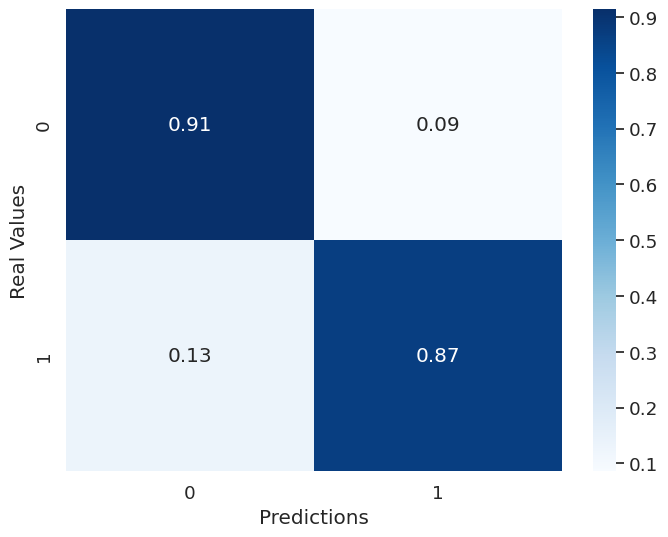

In [ ]:
y_pred = np.argmax(model_3.predict(X_test), axis=-1)


conf_matrix = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)

conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,240 (809.54 KB)

 Trainable params: 68,738 (268.51 KB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 137,478 (537.03 KB)

In [ ]:
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 512)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,311,112 (5.00 MB)

 Trainable params: 436,098 (1.66 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 872,198 (3.33 MB)